# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год


## Групповой проект №1. Exploratory Data Analysis

## Описание задания

<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  

В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков


* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user rating size` - общий рейтинг пользователей.

# Наш EDA

#### Скачивание данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from google.colab import drive

drive.mount('/content/drive')
data = pd.read_excel("drive/MyDrive/NetflixShows.xlsx")
data

Mounted at /content/drive


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data_nd = data.drop_duplicates()

In [ ]:
data_nd[data_nd.title=='Once Upon a Time']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,70,2016,98.0,80


#### Дубликаты

In [ ]:
print(f"Исходное количество строк: {len(data)}")
df_clean = data.drop_duplicates()
print(f"После удаления полных дубликатов: {len(df_clean)}")

Исходное количество строк: 1000
После удаления полных дубликатов: 500


In [ ]:
dubl = data_nd.groupby(['title', 'release year'])['rating'].count().reset_index(name='count')
dubl[dubl['count'] > 1]

,title,release year,count
68,Bordertown,2016,2


Далее обработка

In [ ]:
data_nd[data_nd['title'] == 'Bordertown']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,86.0,80
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82


Это два разных фильма, а не дубликат

In [ ]:
data_nd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   ratingDescription  500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  256 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


1.Ошибка данных - при автоматическом сборе информации о фильмах

2.Разные источники - данные собраны из нескольких каталогов с разными метаданными

3.Синхронизация между разными системами

Дубликатов много
Статистика:

Всего было 1000 строк, удалили 500 строк, когда они были полностью идентичны

Больше всего дубликатов у самых популярных шоу, так как у них часто разный рейтинг на разных сайтах, их переводят на разные языки и страны устанавливают свои ограничения.

Мы не считаем дубликатом, если у фильмов разные даты выхода, так как это разные сезоны или части, а не один и тот же фильм

#### Рейтинговые группы

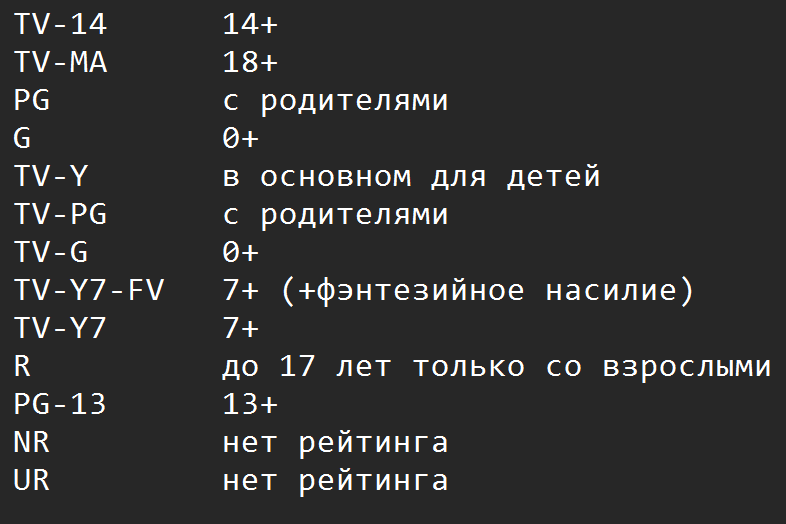

In [ ]:
data_nd

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


**13 групп**

In [ ]:
data_nd['rating'].value_counts()

,count
rating,
TV-14,106
TV-MA,82
PG,76
G,53
TV-Y,36
TV-PG,33
TV-G,29
TV-Y7-FV,25
TV-Y7,23


In [ ]:
data_nd[data_nd['rating']=='UR']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
38,White Girl,UR,This movie has not been rated. Intended for ad...,124,2016,NaN,82


In [ ]:
data_nd['ratingLevel'].value_counts()

,count
ratingLevel,
Parents strongly cautioned. May be unsuitable for children ages 14 and under.,100
Suitable for all ages.,65
For mature audiences. May not be suitable for children 17 and under.,60
General Audiences. Suitable for all ages.,52
Parental guidance suggested. May not be suitable for all children.,31
...,...
"some mild, rude humor",1
brief mild language and some rude behavior,1
some reckless behavior,1


In [ ]:
data_nd.groupby(['rating', 'ratingLevel'])['title'].count().reset_index()

,rating,ratingLevel,title
0,G,General Audiences. Suitable for all ages.,52
1,NR,This movie has not been rated.,7
2,PG,Parental guidance suggested. May not be suitab...,12
3,PG,action and rude humor,1
4,PG,action and some rude humor,1
...,...,...,...
95,TV-PG,Parental guidance suggested. May not be suitab...,31
96,TV-Y,Suitable for all ages.,36
97,TV-Y7,Suitable for children ages 7 and older,23
98,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,25


In [ ]:
data_nd.groupby(['rating', 'ratingLevel'])['title'].count().reset_index()['rating'].value_counts()

,count
rating,
PG,63
R,14
PG-13,12
TV-14,2
G,1
NR,1
TV-G,1
TV-MA,1
TV-PG,1


получается, что описание для рейтинг группы разное только в 4 случаях

**описание, которе всегда одно:**

In [ ]:
help = data_nd.groupby(['rating', 'ratingLevel'])['title'].count().reset_index()
help[help['rating'].isin(['G', 'NR', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'])]

,rating,ratingLevel,title
0,G,General Audiences. Suitable for all ages.,52
1,NR,This movie has not been rated.,7
93,TV-G,Suitable for all ages.,29
94,TV-MA,For mature audiences. May not be suitable for...,60
95,TV-PG,Parental guidance suggested. May not be suitab...,31
96,TV-Y,Suitable for all ages.,36
97,TV-Y7,Suitable for children ages 7 and older,23
98,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,25
99,UR,This movie has not been rated. Intended for ad...,1


**описание, которе разное:**

In [ ]:
help[help['rating'] == 'PG']

,rating,ratingLevel,title
2,PG,Parental guidance suggested. May not be suitab...,12
3,PG,action and rude humor,1
4,PG,action and some rude humor,1
5,PG,"action and violence throughout, and mild language",1
6,PG,action sequences and peril,1
...,...,...,...
60,PG,"some thematic elements, rude humor and action",1
61,PG,"thematic elements, an accident scene and some ...",1
62,PG,"thematic elements, scary images, action and peril",1
63,PG,"thematic elements, scary images, some language...",1


In [ ]:
help[help['rating'] == 'R']

,rating,ratingLevel,title
77,R,Restricted. May be inappropriate for children ...,1
78,R,"bloody war violence, language throughout and s...",1
79,R,language and brief violence,1
80,R,"language, drug content, sexuality/nudity, and ...",1
81,R,"language, some drug use, violence and partial ...",1
82,R,"pervasive drug content and language, some viol...",1
83,R,"pervasive language, some sexual material, viol...",1
84,R,"pervasive sexual content, brief graphic nudity...",1
85,R,some sexual material,1
86,R,"some sexual material, and language throughout",1


In [ ]:
help[help['rating'] == 'PG-13']

,rating,ratingLevel,title
65,PG-13,"For some rude and suggestive material, and for...",1
66,PG-13,Parents strongly cautioned. May be inappropria...,1
67,PG-13,"adult content, adult language and mild violence",1
68,PG-13,"crude and sexual humor, language and some drug...",1
69,PG-13,"crude and suggestive humor, and for language",1
70,PG-13,language and some crude sexual humor,1
71,PG-13,language and some sexual humor,1
72,PG-13,some sex-related material,1
73,PG-13,some violence and one sexual scene,1
74,PG-13,some violent content and mature thematic elements,1


In [ ]:
help[help['rating'] == 'TV-14']

,rating,ratingLevel,title
91,TV-14,Parents strongly cautioned. May be unsuitable ...,100
92,TV-14,"dialogue, language, sexual situations and viol...",1


уменьшила число рейтиногов, тк есть те которые между собо похожи

In [ ]:
data_less_rating = data_nd.copy()
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-G', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-Y', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-MA', 'R')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-PG', 'PG')
data_less_rating['rating'] = data_less_rating['rating'].replace('UR', 'NR')
data_less_rating['rating'].value_counts()

,count
rating,
G,118
PG,109
TV-14,106
R,96
TV-Y7-FV,25
TV-Y7,23
PG-13,12
NR,11


#### Оценки пользователей

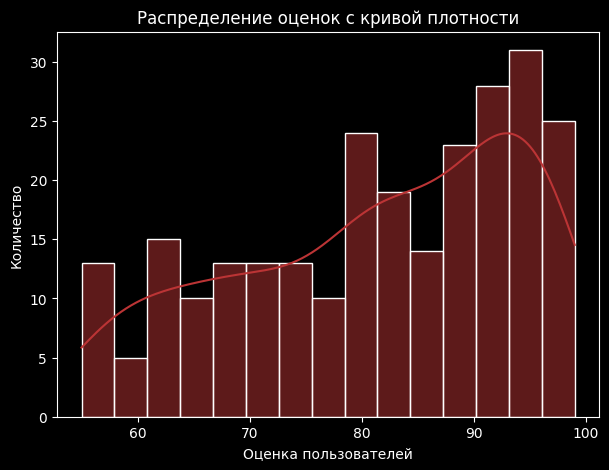

In [ ]:
plt.figure(figsize=(7, 5), facecolor='black')
with plt.style.context('dark_background'):
  sns.histplot(data=data_nd, x='user rating score', kde=True, bins=15, color='#bb3435')
  plt.title('Распределение оценок с кривой плотности')
  plt.xlabel('Оценка пользователей')
  plt.ylabel('Количество')
plt.show()

In [ ]:
data_nd.describe()

,ratingDescription,release year,user rating score,user rating size
count,500.000000,500.000000,256.000000,500.000000
mean,68.754000,2010.976000,81.398438,80.972000
std,31.505089,7.829305,12.730904,0.998604
min,10.000000,1940.000000,55.000000,80.000000
25%,41.000000,2009.000000,71.000000,80.000000
50%,70.000000,2014.000000,83.500000,80.000000
75%,90.000000,2016.000000,93.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


In [ ]:
data_nd.describe()['user rating score']

,user rating score
count,256.000000
mean,81.398438
std,12.730904
min,55.000000
25%,71.000000
50%,83.500000
75%,93.000000
max,99.000000


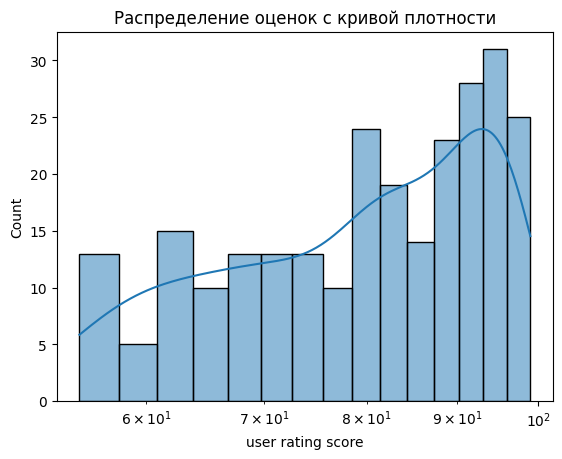

In [ ]:
sns.histplot(data=data_nd, x='user rating score', kde=True, bins=15)
plt.xscale('log')
plt.title('Распределение оценок с кривой плотности')
plt.show()

<Axes: ylabel='user rating score'>

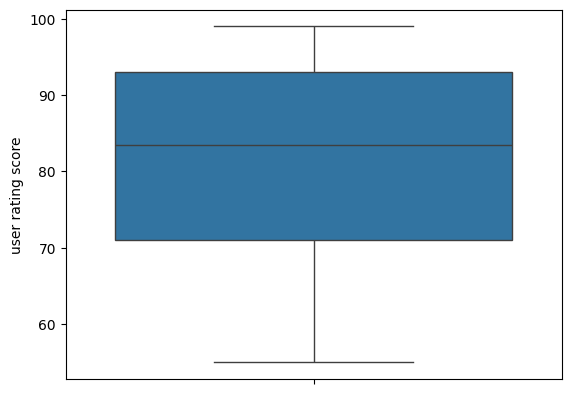

In [ ]:
# boxplot
sns.boxplot(data_nd['user rating score'])

<Axes: xlabel='rating', ylabel='user rating score'>

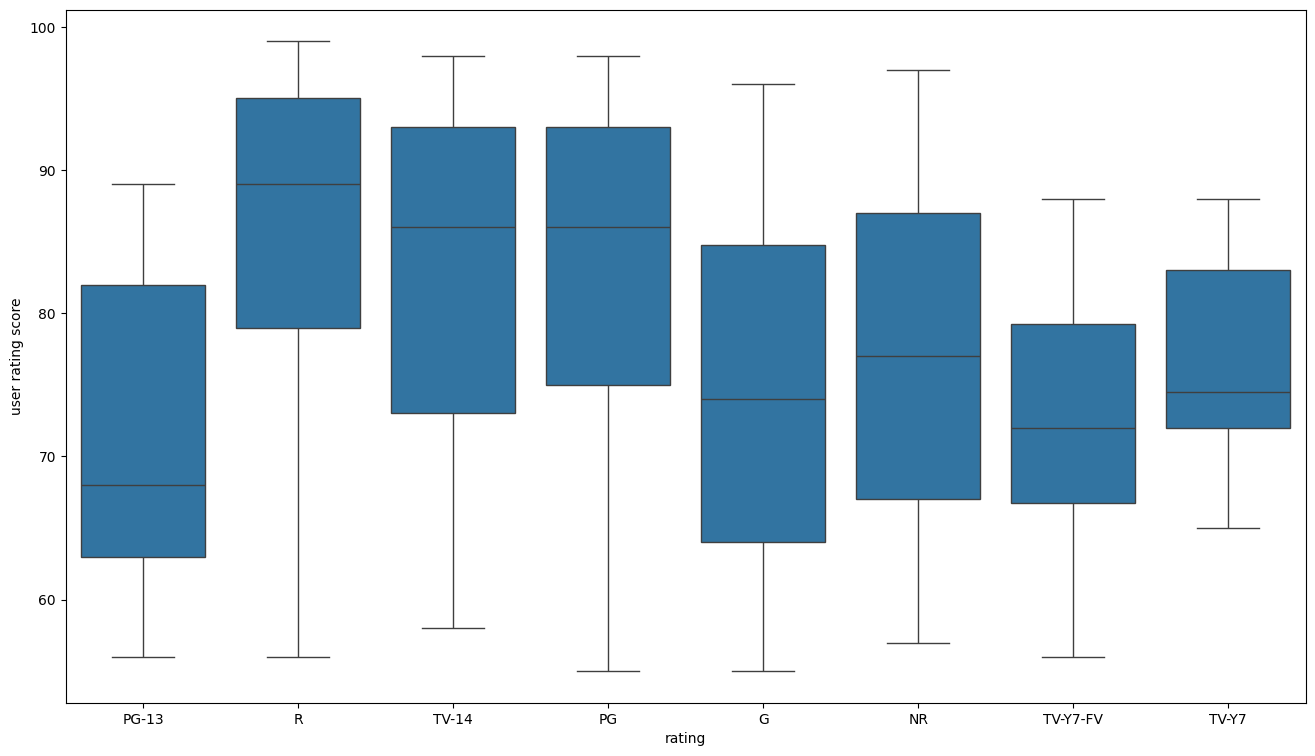

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(x='rating', y='user rating score', data=data_less_rating)

<Axes: xlabel='release year', ylabel='user rating score'>

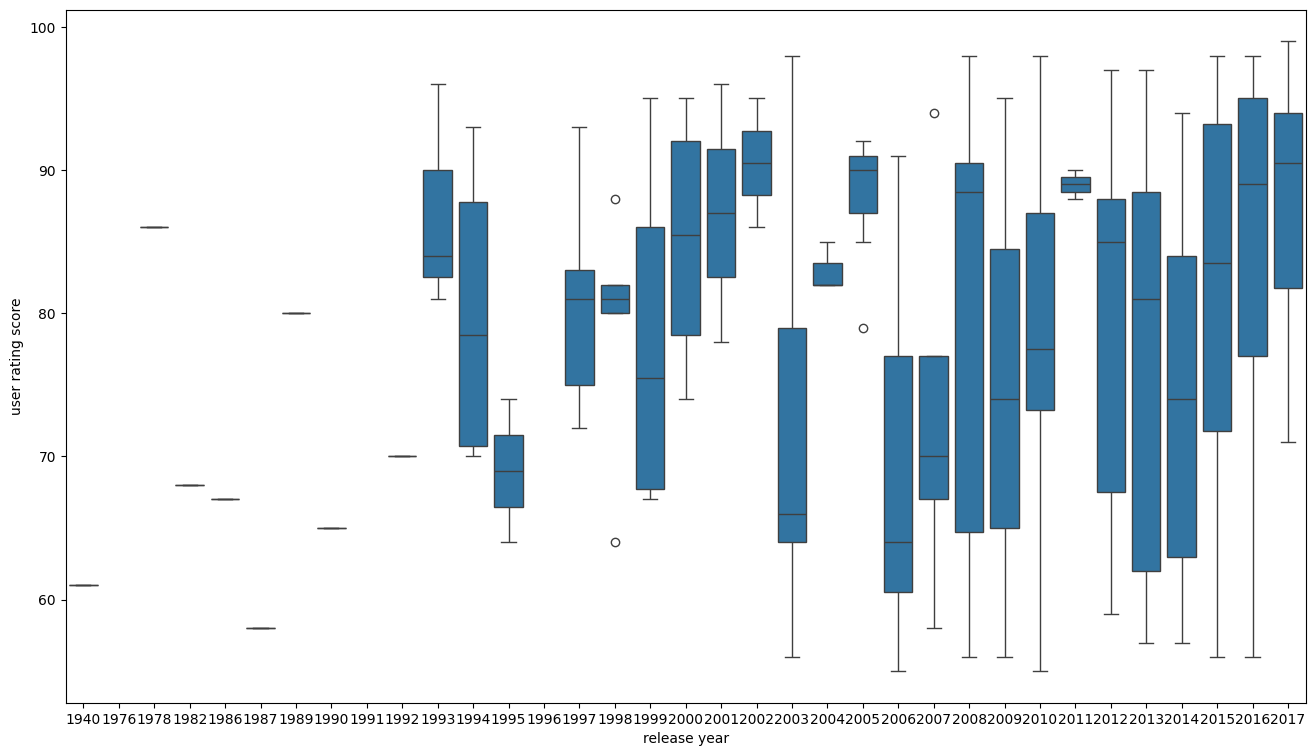

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(x='release year', y='user rating score', data=data_nd)

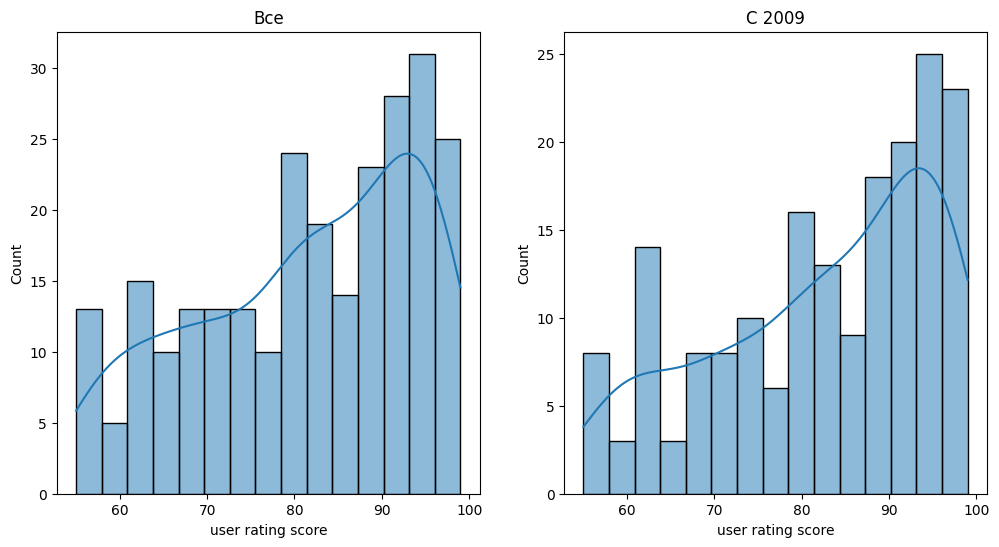

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

l = [data_nd['user rating score'], data_nd[data_nd['release year'] >= 2009]['user rating score']]
t = ['Все', 'С 2009']

for idx, ax in enumerate(axes.ravel()):
  # ax.hist(l[idx])
  sns.histplot(l[idx], kde=True, bins=15, ax=ax)
  ax.set_title(t[idx])

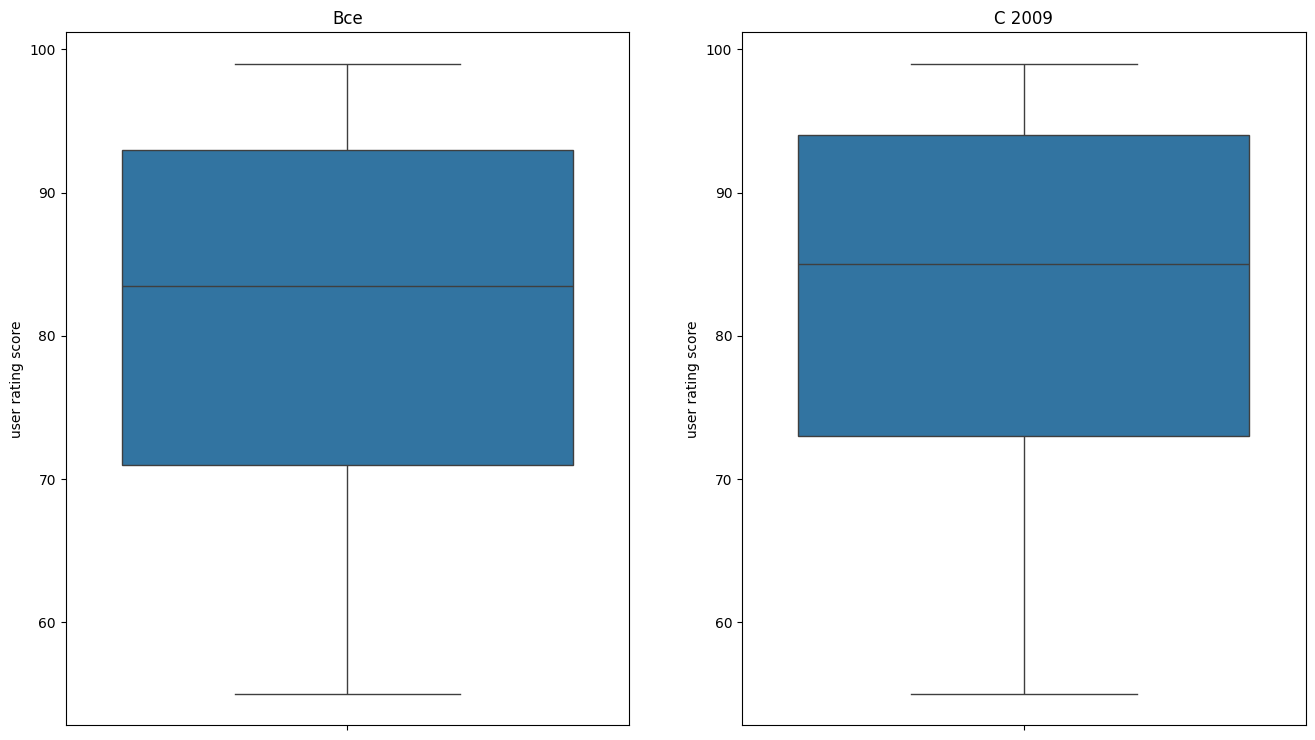

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))

l = [data_nd['user rating score'], data_nd[data_nd['release year'] >= 2009]['user rating score']]
t = ['Все', 'С 2009']

for idx, ax in enumerate(axes.ravel()):
  # ax.hist(l[idx])
  sns.boxplot(l[idx], ax=ax)
  ax.set_title(t[idx])

In [ ]:
ratings = data_nd["user rating score"].dropna()
mean_val = np.mean(ratings)
std_val = np.std(ratings)
min_val = np.min(ratings)
max_val = np.max(ratings)
median_val = np.median(ratings)
print("Среднее:", mean_val)
print("Стандартное отклонение:", std_val)
print("Минимум:", min_val)
print("Максимум:", max_val)
print("Медиана:", median_val)

Есть разница между медианой и средним, но она небольшая.

В общем случае:
Среднее (mean) чувствительно к выбросам и сильным перекосам в распределении. Например, если большинство фильмов имеют высокие оценки, но есть несколько с очень низкими, то среднее «утянется» вниз.

Медиана (median) более устойчива к выбросам, потому что отражает «середину» распределения.

Когда они могут сильно отличаться?
Скошенное распределение (skewness):

Если много низких оценок и мало очень высоких → среднее < медианы.

Если наоборот (много высоких и редкие низкие) → среднее > медианы.

У нас: большинство фильмов имеют высокие оценки (около 88), но встречаются более низкие оценки (55–70), которые «тянут» среднее в меньшую сторону. Медиана = 88 говорит: «половина фильмов имеет рейтинг выше 88, половина ниже». Среднее = 84 оказалось меньше → значит, есть группа фильмов с низкими оценками, которые снижают среднее значение.

#### Распределение по годам

In [ ]:
data_nd['release year'].value_counts().sort_index()

<Axes: >

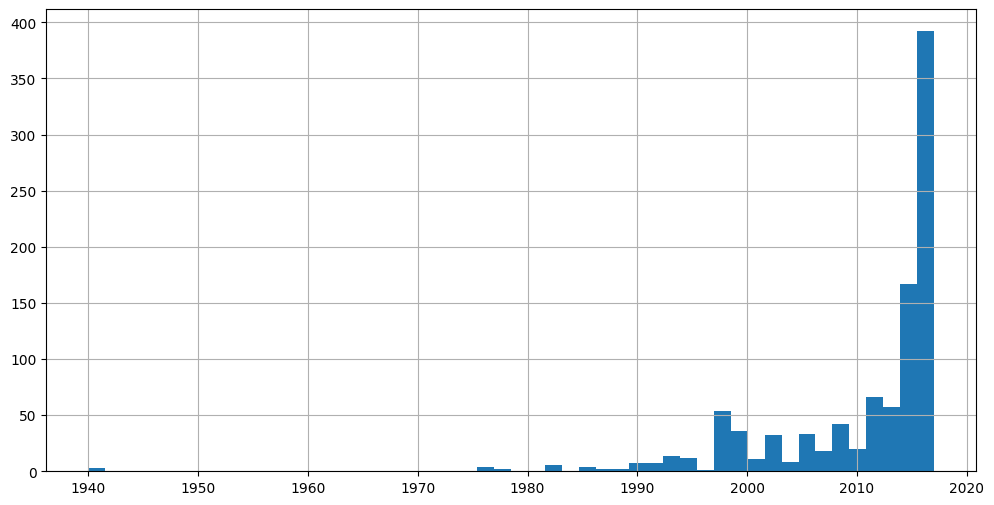

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data['release year'].hist(bins=50)

In [ ]:
data_nd

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


In [ ]:
distr_year = data_nd.groupby('release year')['title'].count().reset_index().sort_values('release year')
distr_year

,release year,title
0,1940,1
1,1976,1
2,1978,1
3,1982,2
4,1986,1
5,1987,1
6,1989,2
7,1990,2
8,1991,1
9,1992,1


In [ ]:
import plotly
import plotly.graph_objects as go
trace = go.Scatter(x=distr_year['release year'], y=distr_year['title'])
fig = go.Figure(data=trace)
fig.update_layout(title="Распределение выпущенных фильмов по годам")
fig.show()

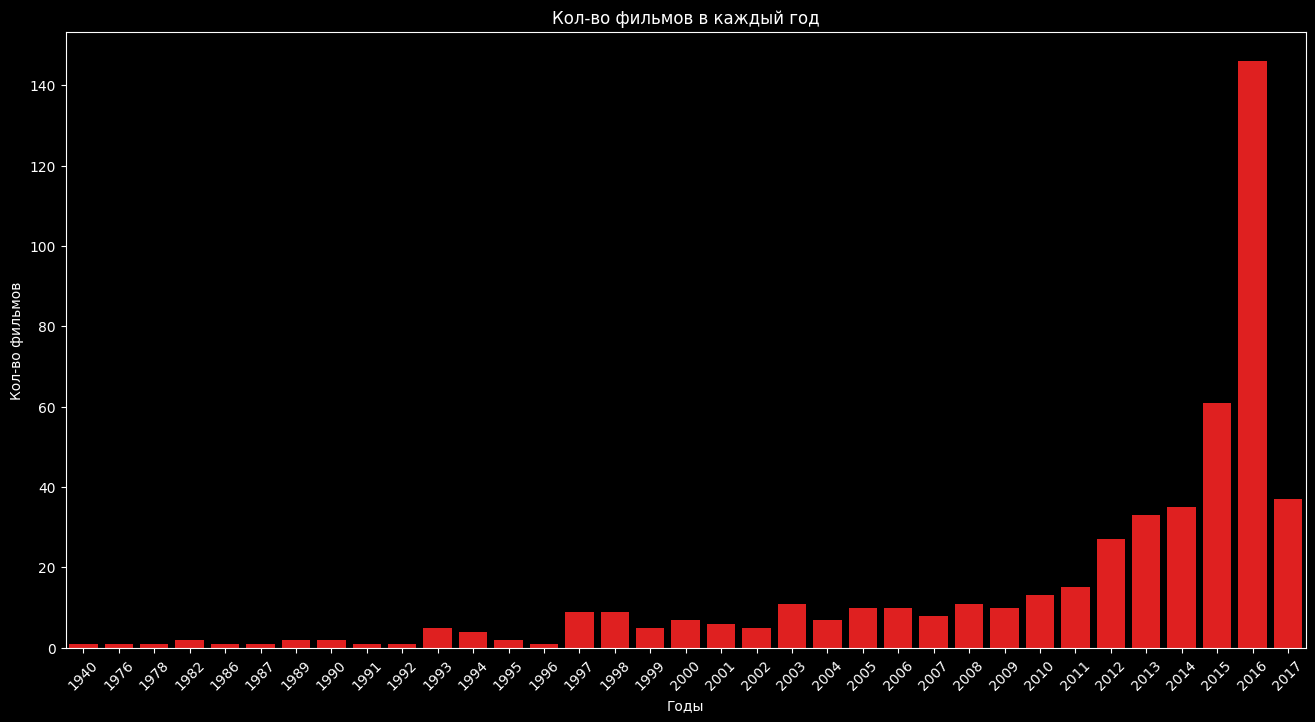

In [ ]:
plt.figure(figsize=(16, 8), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(data=distr_year, x='release year', y='title', color='red')
  plt.xlabel('Годы')
  plt.xticks(rotation=45)
  plt.ylabel('Кол-во фильмов')
  plt.title('Кол-во фильмов в каждый год')
plt.show()

<Axes: ylabel='title'>

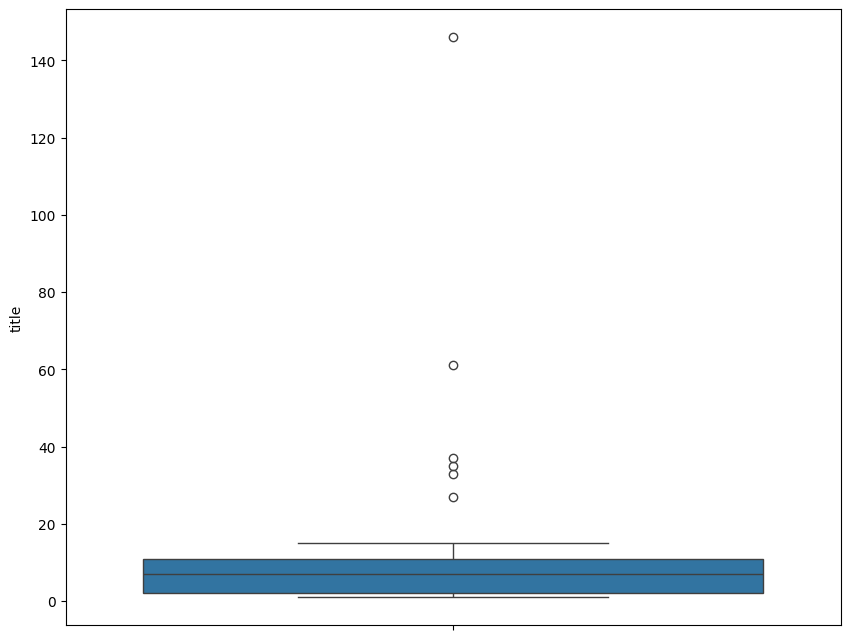

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=distr_year, y='title')

1) глобально рост есть, но в целом из года в год кол-во может проседать
2) есть выброс, конкретно 2016 привлекает внимание

видимо 16-ый год был праймом нетфликса

In [ ]:
data_nd[data_nd['release year'] == 2016]['title'].value_counts().reset_index()

,title,count
0,Bordertown,2
1,Supernatural,1
2,Pretty Little Liars,1
3,Once Upon a Time,1
4,Sherlock,1
...,...,...
140,Alpha and Omega: Dino Digs,1
141,Quackerz,1
142,Puffin Rock,1
143,LEGO Jurassic World: The Indominus Escape,1


In [ ]:
data_nd[data_nd['title'] == 'Bordertown']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,86.0,80
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,110,2016,NaN,82


In [ ]:
data_nd[data_nd['release year'] == 2016]['title'].value_counts().reset_index()['count'].value_counts()

,count
count,
1,144
2,1


In [ ]:
help1 = data_nd[(data_nd['release year'] == 2016) | (data_nd['release year'] == 2015)].groupby('title')['release year'].count().reset_index()
help1

,title,release year
0,0.03,1
1,100 Metros,1
2,A Weekend with the Family,1
3,Alice Through the Looking Glass,1
4,All Hail King Julien,1
...,...,...
201,Walt Disney Animation Studios Short Films Coll...,1
202,White Girl,1
203,Wiener Dog Internationals,1
204,Word Party,1


In [ ]:
help1['release year'].value_counts()

,count
release year,
1,205
2,1


In [ ]:
help1[help1['release year'] > 1]

,title,release year
28,Bordertown,2


получается, сериалы которые выхожили в 2015 не выходили в 2016, то есть в этом плане повторов нет

#### Сравнение средней оценки пользователей в 2016 со средней оценкой в 2017

In [ ]:
data_n=data_nd.dropna()
mean_2016 = np.mean(data_n.loc[data_n["release year"] == 2016, "user rating score"])
mean_2017 = np.mean(data_n.loc[data_n["release year"] == 2017, "user rating score"])
print("Средняя оценка в 2016 году:", mean_2016)
print("Средняя оценка в 2017 году:", mean_2017)
m_2016 = np.median(data_n.loc[data_n["release year"] == 2016, "user rating score"])
m_2017 = np.median(data_n.loc[data_n["release year"] == 2017, "user rating score"])
print("Медиана в 2016 году:", m_2016)
print("Медиана в 2017 году:", m_2017)
mx_2016 = np.max(data_n.loc[data_n["release year"] == 2016, "user rating score"])
mx_2017 = np.max(data_n.loc[data_n["release year"] == 2017, "user rating score"])
print("max в 2016 году:", mx_2016)
print("max в 2017 году:", mx_2017)

#### Распределение пользователей по рейтинговым группам

In [ ]:
import plotly.express as px
import pandas as pd

rating_counts = data_nd['rating'].value_counts().reset_index(name='count')

fig = px.pie(rating_counts, values='count', names='rating')
fig.update_layout(title_text='Распределение шоу Netflix по рейтинговым группам.', title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#FFFFFF', width=0.5)))
fig.show()

In [ ]:
rating_counts = data_less_rating['rating'].value_counts().reset_index(name='count')
rating_counts.columns = ['rating', 'count']

fig = px.pie(rating_counts, values='count', names='rating')
fig.update_layout(title_text='Распределение шоу Netflix по рейтинговым группам.', title_x=0.5)
fig.show()

In [ ]:
rating_counts = data_less_rating['rating'].value_counts().reset_index(name='count')

fig = px.pie(rating_counts, values='count', names='rating')
fig.update_layout(title_text='Распределение шоу по рейтинговым группам', title_x=0.5,
                  paper_bgcolor='black', plot_bgcolor='black', font_color='white')
fig.update_traces(marker_colors=px.colors.sequential.Reds_r)
fig.show()

#### Распределение шоу по группам в зависимости от оценок

In [ ]:
data_less_rating.head(3)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80


In [ ]:
data_nd.describe()['user rating score']

,user rating score
count,256.000000
mean,81.398438
std,12.730904
min,55.000000
25%,71.000000
50%,83.500000
75%,93.000000
max,99.000000


##### высокие (>=75%)

In [ ]:
helping = data_less_rating[data_less_rating['user rating score'] >= 93]
rating_counts_high = helping['rating'].value_counts().reset_index(name='count')
rating_counts_high = rating_counts_high.merge(data_less_rating.groupby('rating')['user rating score'].count().reset_index(name='all'), on='rating')
rating_counts_high['percent'] = rating_counts_high['count'] / rating_counts_high['all'] * 100
rating_counts_high = rating_counts_high.sort_values('rating')
rating_counts_high

,rating,count,all,percent
3,G,4,38,10.526316
4,NR,1,2,50.000000
0,PG,22,69,31.884058
2,R,17,47,36.170213
1,TV-14,21,77,27.272727


/tmp/ipython-input-2357514126.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




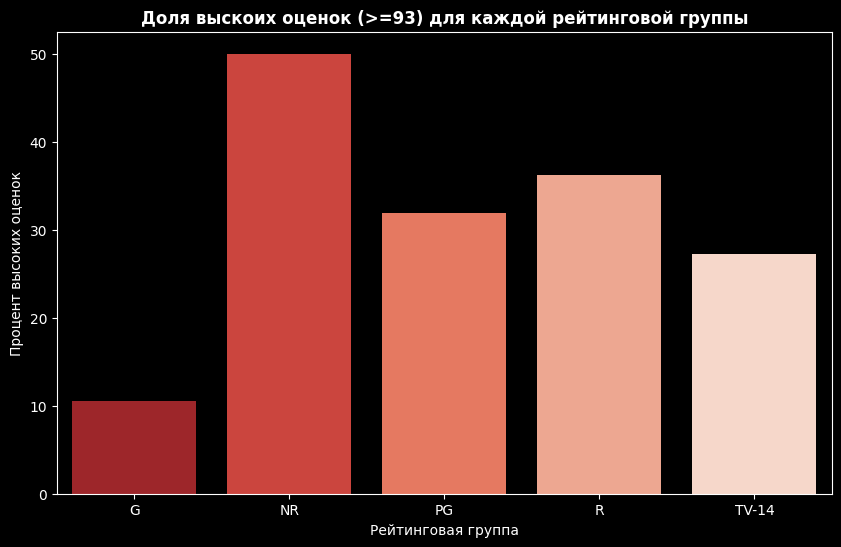

In [ ]:
plt.figure(figsize=(10, 6), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(rating_counts_high, x='rating', y='percent', palette='Reds_r')

  plt.title('Доля выскоих оценок (>=93) для каждой рейтинговой группы', fontweight='bold')
  plt.xlabel('Рейтинговая группа')
  plt.ylabel('Процент высоких оценок')

plt.show()

In [ ]:
data_nd[data_nd.rating == 'NR']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
19,The 100,NR,This movie has not been rated.,124,2016,97.0,80
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,124,2013,NaN,82
23,Hunter X Hunter (2011),NR,This movie has not been rated.,124,2013,57.0,80
37,"Sex, Love and Therapy",NR,This movie has not been rated.,124,2014,NaN,82
46,Stronger Than the World,NR,NaN,124,2016,NaN,82
47,Back and Forth,NR,This movie has not been rated.,124,2016,NaN,82
149,Almost Adults,NR,This movie has not been rated.,124,2016,NaN,82
191,Honeytrap,NR,This movie has not been rated.,124,2014,NaN,82
194,Like Cotton Twines,NR,NaN,124,2016,NaN,82
448,I.T,NR,NaN,124,2016,NaN,82


##### средние (50%<x<75%)

In [ ]:
helping = data_less_rating[(data_less_rating['user rating score'] < 93) & (data_less_rating['user rating score'] > 83.5)]
rating_counts_mid = helping['rating'].value_counts().reset_index(name='count')
rating_counts_mid = rating_counts_mid.merge(data_less_rating.groupby('rating')['user rating score'].count().reset_index(name='all'), on='rating')
rating_counts_mid['percent'] = rating_counts_mid['count'] / rating_counts_mid['all'] * 100
rating_counts_mid.sort_values('percent')

,rating,count,all,percent
5,PG-13,1,9,11.111111
6,TV-Y7-FV,1,8,12.500000
3,G,7,38,18.421053
2,R,11,47,23.404255
1,PG,19,69,27.536232
0,TV-14,22,77,28.571429
4,TV-Y7,2,6,33.333333


/tmp/ipython-input-1855824652.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




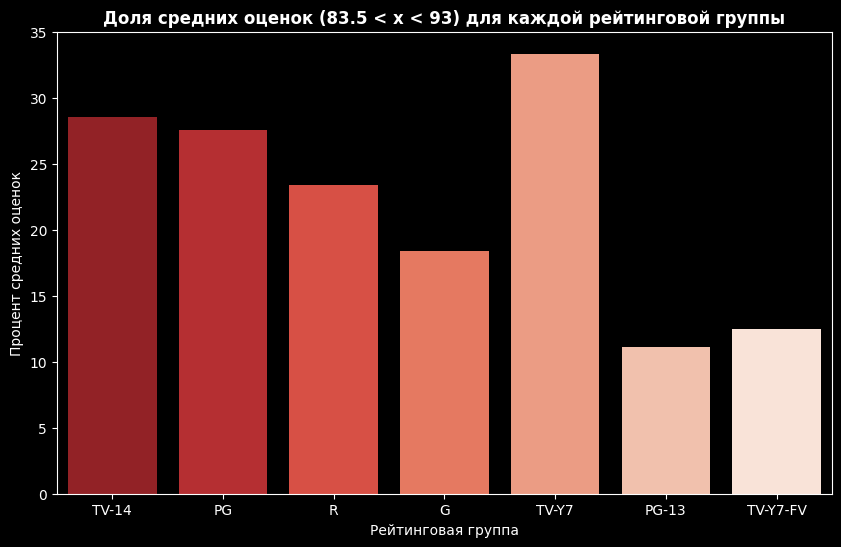

In [ ]:
plt.figure(figsize=(10, 6), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(rating_counts_mid, x='rating', y='percent', palette='Reds_r')

  plt.title('Доля средних оценок (83.5 < x < 93) для каждой рейтинговой группы', fontweight='bold')
  plt.xlabel('Рейтинговая группа')
  plt.ylabel('Процент средних оценок')

plt.show()

##### низкие (25% < x <= 50%)

In [ ]:
helping = data_less_rating[(data_less_rating['user rating score'] <= 83.5) & (data_less_rating['user rating score'] > 71)]
rating_counts_sm = helping['rating'].value_counts().reset_index(name='count')
rating_counts_sm = rating_counts_sm.merge(data_less_rating.groupby('rating')['user rating score'].count().reset_index(name='all'), on='rating')
rating_counts_sm['percent'] = rating_counts_sm['count'] / rating_counts_sm['all'] * 100
rating_counts_sm.sort_values('percent')

,rating,count,all,percent
1,PG,15,69,21.739130
0,TV-14,17,77,22.077922
3,G,9,38,23.684211
2,R,12,47,25.531915
4,PG-13,3,9,33.333333
5,TV-Y7-FV,3,8,37.500000
6,TV-Y7,3,6,50.000000


/tmp/ipython-input-670690425.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




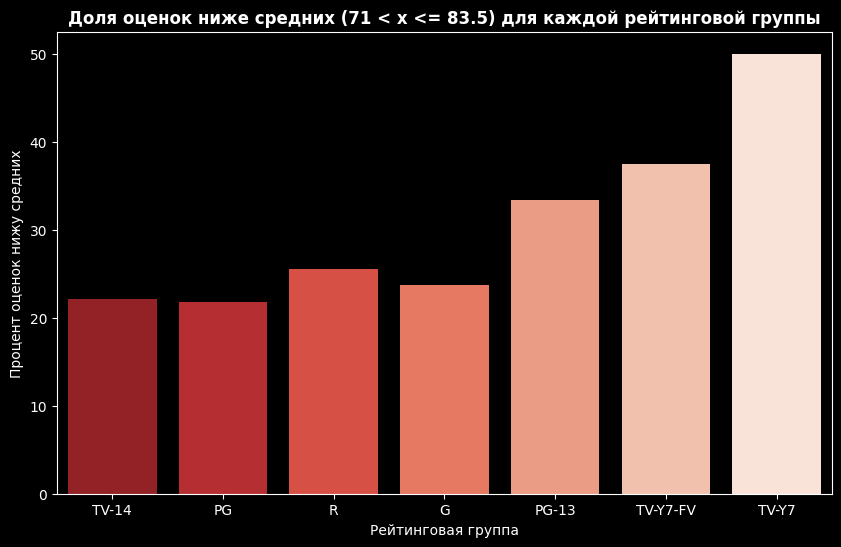

In [ ]:
plt.figure(figsize=(10, 6), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(rating_counts_sm, x='rating', y='percent', palette='Reds_r')

  plt.title('Доля оценок ниже средних (71 < x <= 83.5) для каждой рейтинговой группы', fontweight='bold')
  plt.xlabel('Рейтинговая группа')
  plt.ylabel('Процент оценок нижу средних')

plt.show()

##### совсем низкие (<=25%)

In [ ]:
helping = data_less_rating[data_less_rating['user rating score'] <= 71]
rating_counts_ssm = helping['rating'].value_counts().reset_index(name='count')
rating_counts_ssm = rating_counts_ssm.merge(data_less_rating.groupby('rating')['user rating score'].count().reset_index(name='all'), on='rating')
rating_counts_ssm['percent'] = rating_counts_ssm['count'] / rating_counts_ssm['all'] * 100
rating_counts_ssm = rating_counts_ssm.sort_values('rating')
rating_counts_ssm

,rating,count,all,percent
0,G,18,38,47.368421
6,NR,1,2,50.000000
2,PG,13,69,18.840580
4,PG-13,5,9,55.555556
3,R,7,47,14.893617
1,TV-14,17,77,22.077922
7,TV-Y7,1,6,16.666667
5,TV-Y7-FV,4,8,50.000000


/tmp/ipython-input-3639351652.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




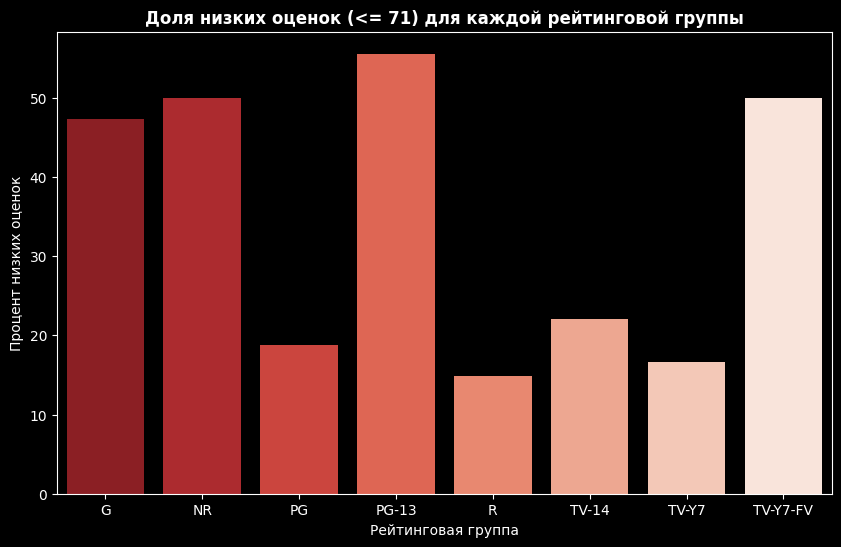

In [ ]:
plt.figure(figsize=(10, 6), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(rating_counts_ssm, x='rating', y='percent', palette='Reds_r')

  plt.title('Доля низких оценок (<= 71) для каждой рейтинговой группы', fontweight='bold')
  plt.xlabel('Рейтинговая группа')
  plt.ylabel('Процент низких оценок')

plt.show()

##### кол-во пропусков оценок по рейтинговым группам

In [ ]:
data_only_nan = data_less_rating[data_less_rating['user rating score'].isna()]
data_only_nan

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
14,The Hunter,R,language and brief violence,100,2011,NaN,82
15,Lottie Dottie Chicken,G,Suitable for all ages.,10,2009,NaN,82
21,"ÌÒ Pai, ÌÒ - Look at This",R,For mature audiences. May not be suitable for...,110,2007,NaN,82
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,124,2013,NaN,82
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
997,Precious Puppies,G,Suitable for all ages.,35,2003,NaN,82


In [ ]:
data_only_nan['user rating score'].value_counts()

,count
user rating score,


In [ ]:
data_nan = data_only_nan.groupby('rating')['title'].count().reset_index(name='count')
data_nan = data_nan.merge(data_less_rating.groupby('rating')['title'].count().reset_index(name='all'), on='rating')
data_nan['percent'] = data_nan['count'] / data_nan['all'] * 100
data_nan.sort_values('percent')

,rating,count,all,percent
3,PG-13,3,12,25.000000
5,TV-14,29,106,27.358491
2,PG,40,109,36.697248
4,R,49,96,51.041667
0,G,80,118,67.796610
7,TV-Y7-FV,17,25,68.000000
6,TV-Y7,17,23,73.913043
1,NR,9,11,81.818182


/tmp/ipython-input-245914067.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




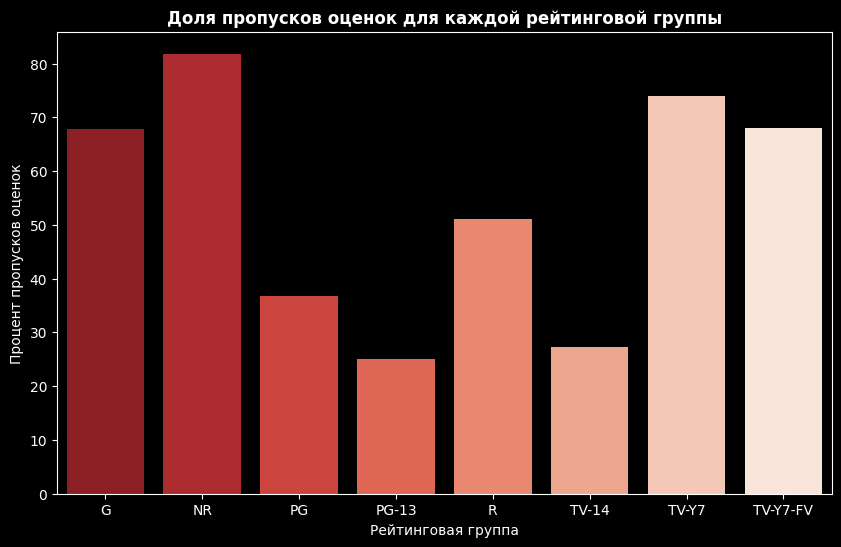

In [ ]:
plt.figure(figsize=(10, 6), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(data_nan, x='rating', y='percent', palette='Reds_r')

  plt.title('Доля пропусков оценок для каждой рейтинговой группы', fontweight='bold')
  plt.xlabel('Рейтинговая группа')
  plt.ylabel('Процент пропусков оценок')

plt.show()

##### средняя оценка в каждой рейтинговой группе

In [ ]:
mid_value = data_less_rating.groupby('rating')['user rating score'].sum().reset_index(name='sum')
mid_value = mid_value.merge(data_less_rating.groupby('rating')['user rating score'].count().reset_index(name='count'), on='rating')
mid_value['mid_value'] = mid_value['sum'] / mid_value['count']
mid_value = mid_value.merge(data_less_rating.groupby('rating')['user rating score'].median().reset_index(name='median'), on='rating')
mid_value

,rating,sum,count,mid_value,median
0,G,2832.0,38,74.526316,74.0
1,NR,154.0,2,77.000000,77.0
2,PG,5797.0,69,84.014493,86.0
3,PG-13,643.0,9,71.444444,68.0
4,R,3990.0,47,84.893617,89.0
5,TV-14,6381.0,77,82.870130,86.0
6,TV-Y7,459.0,6,76.500000,74.5
7,TV-Y7-FV,582.0,8,72.750000,72.0


In [ ]:
data_nd.describe()['user rating score']

,user rating score
count,256.000000
mean,81.398438
std,12.730904
min,55.000000
25%,71.000000
50%,83.500000
75%,93.000000
max,99.000000


#### Самые успешные сериалы за каждый год

In [ ]:
best_shows = (data_nd
    .sort_values(['user rating score', 'user rating size'], ascending=[False, False])
    .groupby('release year')
    .first()
    .reset_index()
)
result = best_shows[['release year', 'title', 'user rating score', 'user rating size']]
result.columns = ['Year', 'Title', 'Rating', 'Votes']

print("Самые высокооцененные шоу по годам:")
print("(при одинаковых оценках (user rating score) выбирается шоу с большим количеством голосов (user rating size))")
print(' ')
for _, row in result.iterrows():
    print(f"{int(row['Year'])}: {row['Title']} - {row['Rating']} баллов ({row['Votes']} голосов)")

Самые высокооцененные шоу по годам:
(при одинаковых оценках (user rating score) выбирается шоу с большим количеством голосов (user rating size))
 
1940: Fantasia - 61.0 баллов (80 голосов)
1976: The Smurfs and the Magic Flute - nan баллов (82 голосов)
1978: Grease - 86.0 баллов (80 голосов)
1982: Annie - 68.0 баллов (80 голосов)
1986: An American Tail - 67.0 баллов (80 голосов)
1987: Harry and the Hendersons - 58.0 баллов (80 голосов)
1989: Honey, I Shrunk the Kids - 80.0 баллов (80 голосов)
1990: The Real Ghostbusters - 65.0 баллов (80 голосов)
1991: An American Tail: Fievel Goes West - nan баллов (82 голосов)
1992: FernGully: The Last Rainforest - 70.0 баллов (80 голосов)
1993: Homeward Bound: The Incredible Journey - 96.0 баллов (80 голосов)
1994: Blank Check - 93.0 баллов (80 голосов)
1995: Heavyweights - 74.0 баллов (80 голосов)
1996: Power Rangers Zeo - nan баллов (82 голосов)
1997: Anastasia - 93.0 баллов (80 голосов)
1998: Goosebumps - 88.0 баллов (80 голосов)
1999: Tarzan - 95

Самое успешное шоу всех времен, основывается на оценках пользователей и количестве оценок пользователей

In [ ]:
data_less_rating[data_less_rating['user rating score'] > 98]

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
41,13 Reasons Why,R,For mature audiences. May not be suitable for...,110,2017,99.0,80


#### почему у нетфликса резко взросло количество фильмов в 2016

2012 год — начало экспансии в Европу, запуск сервиса в Соединённом Королевстве и Ирландии. Самые распрстраненные места для съемок - Канада и Ирландия, так как их природа идеально подходит для красивой картинки. Открытие новых территорий для съемок фильмов и сериалов. Новые идеи.

2013 год — подписание соглашения с Time Warner's Turner Broadcasting System и Warner Bros. Television о распространении Cartoon Network, Warner Bros. Анимация и контента для взрослых, а также программы TNT «Даллас».

После подписания соглашения и появления новых анимаций, начинаются съемки новых фильмов и сериалов

примеры сериалов:
Stranger Things	2016	The concept was created by the Duffer Brothers, and the project was likely in early development stages before filming.

The OA	2016	Similarly, the creation of its original concept and scripts likely started before the filming year. Работа над концепцией сериала началась в декабре 2012 года

Luke Cage	2016	As part of the Marvel-Netflix deal announced in 2013, this series was in planning from that time. Разработка сериала «Люк Кейдж» (Luke Cage) началась в конце 2013 года. Начали снимать в 2015 году

Love	2016	The series was announced in 2014, confirming its pre-production started in the 2013-2014 period.

3%	2016	The original Brazilian pilot was produced in 2009, and the series was in development for Netflix before its 2016 release.


Это показывает, что после того, как были подписаны договоры и соглашения Netflix стал развиваться, так как у него появилось много новых возможностей, которые могут заинтересовать зрителей, поэтому многие сериалы были спродюсированны в 2014-2015 году и выпущены в течении 2016

#### Работа с пропусками

заполняю пропуски в user rating score средним по рейтингу и году, оставшиеся - средним по рейтингу

In [ ]:
data_fna = data_less_rating

data_fna['user rating score'] = data_fna.groupby(['rating', 'release year'])['user rating score']\
                          .transform(lambda x: x.fillna(x.mean()))
data_fna['user rating score'] = data_fna.groupby('rating')['user rating score']\
                          .transform(lambda x: x.fillna(x.mean()))
data_fna['user rating score'].isna().any()

np.False_

In [ ]:
data_fna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   ratingDescription  500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  500 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


как видим, пропусков не осталось

rating level - зависит от рейтинга, а эти данные есть, поэтому эти пропуски можно игнорировать

#### Группы рейтингов

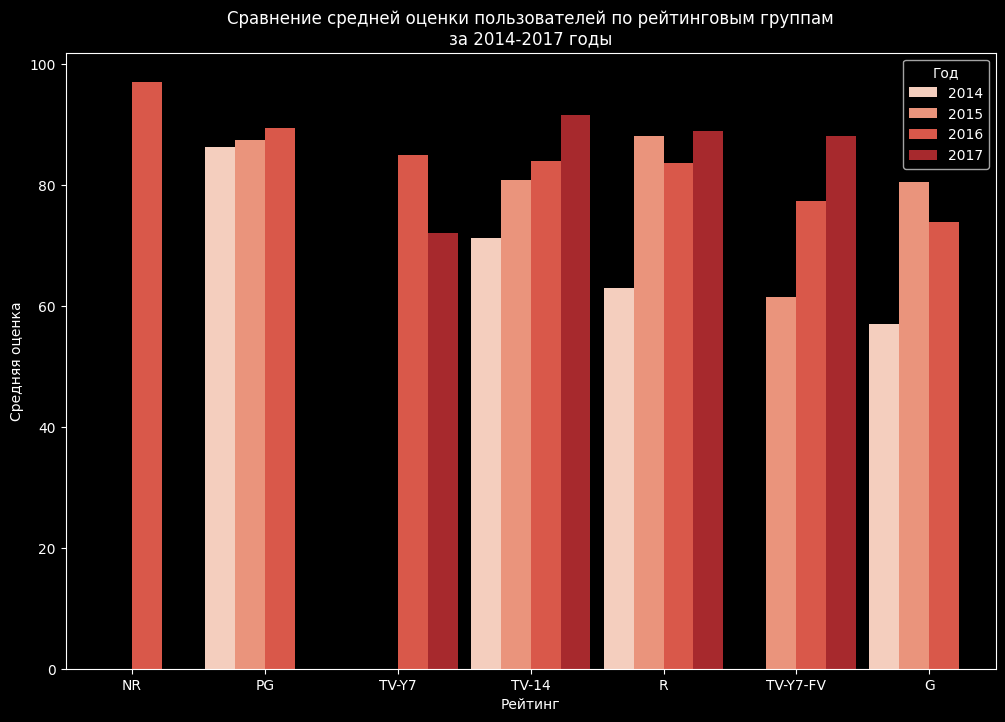

In [ ]:
data_2014 = data_less_rating[data_less_rating['release year'] == 2014]
data_2015 = data_less_rating[data_less_rating['release year'] == 2015]
data_2016 = data_less_rating[data_less_rating['release year'] == 2016]
data_2017 = data_less_rating[data_less_rating['release year'] == 2017]
rating_scores_2014 = data_2014.groupby('rating')['user rating score'].mean()
rating_scores_2015 = data_2015.groupby('rating')['user rating score'].mean()
rating_scores_2016 = data_2016.groupby('rating')['user rating score'].mean()
rating_scores_2017 = data_2017.groupby('rating')['user rating score'].mean()
all_ratings = sorted(set(rating_scores_2014.index) | set(rating_scores_2015.index) |
                    set(rating_scores_2016.index) | set(rating_scores_2017.index))
rating_scores_2014 = rating_scores_2014.reindex(all_ratings, fill_value=0)
rating_scores_2015 = rating_scores_2015.reindex(all_ratings, fill_value=0)
rating_scores_2016 = rating_scores_2016.reindex(all_ratings, fill_value=0)
rating_scores_2017 = rating_scores_2017.reindex(all_ratings, fill_value=0)
sorted_indices = rating_scores_2016.sort_values(ascending=False).index
data_res = pd.DataFrame({
    'Рейтинг': sorted_indices.tolist()*4,
    'Средняя оценка': np.concatenate([
        rating_scores_2014.loc[sorted_indices].values,
        rating_scores_2015.loc[sorted_indices].values,
        rating_scores_2016.loc[sorted_indices].values,
        rating_scores_2017.loc[sorted_indices].values
    ]),
    'Год': ['2014'] * len(sorted_indices) + ['2015'] * len(sorted_indices) + ['2016'] * len(sorted_indices) + ['2017'] * len(sorted_indices)
})
plt.figure(figsize=(12, 8), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(data=data_res, x='Рейтинг', y='Средняя оценка', hue='Год', palette='Reds', width=0.9)
  plt.title('Сравнение средней оценки пользователей по рейтинговым группам\nза 2014-2017 годы')
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

data_nd = data.drop_duplicates()
data_less_rating = data_nd.copy()
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-G', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-Y', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-MA', 'R')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-PG', 'PG')
data_less_rating['rating'] = data_less_rating['rating'].replace('UR', 'NR')
data_2017 = data_less_rating[data_less_rating['release year'] == 2017]
rating_counts_2017 = data_2017['rating'].value_counts()
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=rating_counts_2017.index,
        values=rating_counts_2017.values,
        textinfo='percent+label',
        textposition='inside'
    )
)
fig.update_layout(
    title_text="Распределение рейтинговых групп Netflix за 2017 год",
    title_x=0.5,
    title_font_size=20,
    showlegend=False,
    height=600
)
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

data_nd = data.drop_duplicates()
data_less_rating = data_nd.copy()
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-G', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-Y', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-MA', 'R')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-PG', 'PG')
data_less_rating['rating'] = data_less_rating['rating'].replace('UR', 'NR')
data_2017 = data_less_rating[data_less_rating['release year'] == 2015]
rating_counts_2017 = data_2017['rating'].value_counts()
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=rating_counts_2017.index,
        values=rating_counts_2017.values,
        textinfo='percent+label',
        textposition='inside'
    )
)
fig.update_layout(
    title_text="Распределение рейтинговых групп Netflix за 2015 год",
    title_x=0.5,
    title_font_size=20,
    showlegend=False,
    height=600
)
fig.show()

# Работа с другими датасетами

In [ ]:
data_nd = data.drop_duplicates()
data_nd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   ratingDescription  500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  256 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


In [ ]:
data_less_rating = data_nd.copy()
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-G', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-Y', 'G')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-MA', 'R')
data_less_rating['rating'] = data_less_rating['rating'].replace('TV-PG', 'PG')
data_less_rating['rating'] = data_less_rating['rating'].replace('UR', 'NR')
data_less_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        467 non-null    object 
 3   ratingDescription  500 non-null    int64  
 4   release year       500 non-null    int64  
 5   user rating score  256 non-null    float64
 6   user rating size   500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 31.2+ KB


In [ ]:
data_genre_country = pd.read_csv("netflix1.csv")
data_awards = pd.read_excel("Netflix Dataset Latest 2021.xlsx")

In [ ]:
data_genre_country = pd.read_csv("drive/MyDrive/netflix1.csv")
data_awards = pd.read_excel("drive/MyDrive/Netflix Dataset Latest 2021.xlsx")

In [ ]:
# дополнение данных
data_awards = data_awards.rename(columns={'Title': 'title'})
data_all = data_less_rating.merge(data_genre_country[['title', 'country', 'listed_in']], on='title', how='left').merge(data_awards[['title', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Genre']], on='title', how='left')
data_all = data_all.drop_duplicates()
h = data_all.groupby(['title', 'release year']).count().sort_values(by='rating', ascending=False)
data_all = data_all.drop(261)
data_all = data_all.drop(263)
data_all = data_all.drop(205)
data_all = data_all.drop(14)
data_all = data_all.drop(279)
data_all = data_all.drop(392)
data_all = data_all.drop(37)
data_all = data_all.drop(332)
data_all = data_all.drop(379)
data_all.loc[134, 'Awards Nominated For'] = np.nan
data_all.loc[134, 'Genre'] = np.nan
data_all.loc[267, 'listed_in'] = np.nan
data_all.loc[267, 'country'] = np.nan
data_all = data_all.drop(73)
data_all = data_all.drop(257)

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 514
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 500 non-null    object 
 1   rating                500 non-null    object 
 2   ratingLevel           467 non-null    object 
 3   ratingDescription     500 non-null    int64  
 4   release year          500 non-null    int64  
 5   user rating score     256 non-null    float64
 6   user rating size      500 non-null    int64  
 7   country               253 non-null    object 
 8   listed_in             253 non-null    object 
 9   Awards Received       147 non-null    float64
 10  Awards Nominated For  180 non-null    float64
 11  Boxoffice             51 non-null     float64
 12  Genre                 207 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 54.7+ KB


In [ ]:
data_genre_country[data_genre_country['title'] == 'Bordertown']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7253,s2547,TV Show,Bordertown,Not Given,Finland,5/11/2020,2019,TV-MA,3 Seasons,"Crime TV Shows, International TV Shows, TV Dramas"


In [ ]:
data_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9255 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [ ]:
data_all[data_all['title'] == 'Limitless']
data_all[data_all['title'] == 'Revenge']
data_all[data_all['title'] == 'Death Note']
data_all[data_all['title'] == 'Teenage Mutant Ninja Turtles']
data_all[data_all['title'] == 'Annie']
data_all[data_all['title'] == 'Fearless']
data_all[data_all['title'] == 'Goosebumps']
data_all[data_all['title'] == 'Bordertown']
data_all[data_all['title'] == 'Love']
data_all[data_all['title'] == 'Aquarius']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,country,listed_in,Awards Received,Awards Nominated For,Boxoffice,Genre
258,Aquarius,R,For mature audiences. May not be suitable for...,110,2015,NaN,82,United States,"Crime TV Shows, TV Dramas",1.0,1.0,NaN,"Biography, Crime, Drama, Thriller"


In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 514
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 500 non-null    object 
 1   rating                500 non-null    object 
 2   ratingLevel           467 non-null    object 
 3   ratingDescription     500 non-null    int64  
 4   release year          500 non-null    int64  
 5   user rating score     256 non-null    float64
 6   user rating size      500 non-null    int64  
 7   country               253 non-null    object 
 8   listed_in             253 non-null    object 
 9   Awards Received       147 non-null    float64
 10  Awards Nominated For  180 non-null    float64
 11  Boxoffice             51 non-null     float64
 12  Genre                 207 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 54.7+ KB


In [ ]:
# Топ-10 с наибольшими кассовыми сборами
data_all[data_all['Boxoffice'].isna() == False].sort_values('Boxoffice', ascending=False).head(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,country,listed_in,Awards Received,Awards Nominated For,Boxoffice,Genre
406,Minions,PG,action and rude humor,60,2015,96.0,80,NaN,NaN,4.0,27.0,336045770.0,"Animation, Adventure, Comedy, Family, Sci-Fi"
290,Justice League,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,42,2003,66.0,80,NaN,NaN,2.0,13.0,229024295.0,"Action, Adventure, Fantasy, Sci-Fi"
366,Kung Fu Panda,PG,sequences of martial arts action,60,2008,91.0,80,United States,"Children & Family Movies, Comedies",14.0,39.0,215434591.0,"Animation, Action, Adventure, Comedy, Family"
181,Twilight,PG-13,some violence and one sexual scene,80,2008,89.0,80,United States,"Action & Adventure, Dramas, Romantic Movies",29.0,15.0,193962473.0,"Drama, Fantasy, Romance"
176,Grease,PG,Parental guidance suggested. May not be suitab...,60,1978,86.0,80,United States,"Classic Movies, Comedies, Music & Musicals",4.0,10.0,190071103.0,"Musical, Romance"
376,Hotel Transylvania 2,PG,"some scary images, action and rude humor",60,2015,93.0,80,NaN,NaN,1.0,10.0,169700110.0,"Animation, Comedy, Family, Fantasy"
276,Scooby-Doo,PG,"some rude humor, language and some scary action",60,2002,86.0,80,NaN,NaN,5.0,14.0,153294164.0,"Adventure, Comedy, Family, Fantasy, Mystery"
380,Kung Fu Panda 3,PG,martial arts action and some mild rude humor,60,2016,92.0,80,NaN,NaN,1.0,10.0,143528619.0,"Animation, Action, Adventure, Comedy, Family, ..."
277,Chicken Little,G,General Audiences. Suitable for all ages.,35,2005,92.0,80,United States,"Children & Family Movies, Comedies",4.0,15.0,135386665.0,"Animation, Adventure, Comedy, Family, Fantasy,..."
365,Bee Movie,PG,mild suggestive humor,60,2007,94.0,80,United States,"Children & Family Movies, Comedies",1.0,15.0,126631277.0,"Animation, Adventure, Comedy, Family"


#### OHE

In [ ]:
# дополнение NaN данными из Genre
data_all.loc[(data_all.Genre.isna() == False)&(data_all.listed_in.isna()), 'listed_in'] = data_all.loc[(data_all.Genre.isna() == False)&(data_all.listed_in.isna()), 'Genre']
data_all = data_all.drop('Genre', axis=1)

In [ ]:
df_encoded = data_all.copy()
genres_dummies = df_encoded['listed_in'].str.get_dummies(sep=', ')
df_encoded = pd.concat([df_encoded, genres_dummies], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 514
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         500 non-null    object 
 1   rating                        500 non-null    object 
 2   ratingLevel                   467 non-null    object 
 3   ratingDescription             500 non-null    int64  
 4   release year                  500 non-null    int64  
 5   user rating score             256 non-null    float64
 6   user rating size              500 non-null    int64  
 7   country                       253 non-null    object 
 8   listed_in                     306 non-null    object 
 9   Awards Received               147 non-null    float64
 10  Awards Nominated For          180 non-null    float64
 11  Boxoffice                     51 non-null     float64
 12  Action                        500 non-null    int64  
 13  Action & A

In [ ]:
#основные жанры
genres = {
    'Action_Adventure': [
        'Action', 'Action & Adventure', 'Adventure',
        'TV Action & Adventure', 'Sports Movies', 'Sport'
    ],
    'Comedy_Stand-Up': [
        'Comedies', 'Comedy', 'TV Comedies',
        'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'
    ],
    'Drama_Romance': [
        'Drama', 'Dramas', 'TV Dramas',
        'Romance', 'Romantic Movies', 'Romantic TV Shows',
        'Biography', 'History'
    ],
    'Thriller_Horror_Mystery': [
        'Thriller', 'Thrillers', 'Horror', 'Horror Movies', 'TV Horror',
        'Mystery', 'TV Mysteries', 'TV Thrillers',
        'Crime', 'Crime TV Shows'
    ],
    'SciFi_Fantasy': [
        'Sci-Fi', 'Sci-Fi & Fantasy', 'Fantasy',
        'TV Sci-Fi & Fantasy'
    ],
    'Documentary_Educational': [
        'Documentaries', 'Docuseries',
        'Science & Nature TV'
    ],
    'Family_Kids': [
        'Family', 'Children & Family Movies',
        "Kids' TV", 'Teen TV Shows'
    ],
    'International': [
        'International Movies', 'International TV Shows',
        'British TV Shows', 'Korean TV Shows',
        'Spanish-Language TV Shows', 'Anime Series'
    ],
    'Music_Arts': [
        'Music', 'Music & Musicals', 'Musical'
    ],
    'Others': [
        'LGBTQ Movies', 'Independent Movies',
        'Classic Movies', 'Classic & Cult TV',
        'Reality TV', 'Movies','Animation'
    ]
}

In [ ]:
#группируем жанры
def combine_genres(df, genre_columns):
    result_df = df.copy()
    all_genres_to_remove = []
    for group_name, keywords in genres.items():
        matching_cols = []
        for col in genre_columns:
            if any(keyword.lower() in col.lower() for keyword in keywords):
                matching_cols.append(col)
        if matching_cols:
            result_df[group_name] = result_df[matching_cols].any(axis=1).astype(int)
            all_genres_to_remove.extend(matching_cols)
    result_df = result_df.drop(columns=set(all_genres_to_remove))
    return result_df
genre_columns_all = df_encoded.columns.tolist()
df_final = combine_genres(df_encoded, genre_columns_all)
df_final.info()
df_final

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 514
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    500 non-null    object 
 1   rating                   500 non-null    object 
 2   ratingLevel              467 non-null    object 
 3   ratingDescription        500 non-null    int64  
 4   release year             500 non-null    int64  
 5   user rating score        256 non-null    float64
 6   user rating size         500 non-null    int64  
 7   country                  253 non-null    object 
 8   listed_in                306 non-null    object 
 9   Awards Received          147 non-null    float64
 10  Awards Nominated For     180 non-null    float64
 11  Boxoffice                51 non-null     float64
 12  Action_Adventure         500 non-null    int64  
 13  Comedy_Stand-Up          500 non-null    int64  
 14  Drama_Romance            500 no

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,country,listed_in,Awards Received,...,Action_Adventure,Comedy_Stand-Up,Drama_Romance,Thriller_Horror_Mystery,SciFi_Fantasy,Documentary_Educational,Family_Kids,International,Music_Arts,Others
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,NaN,"Comedy, Crime",3.0,...,0,1,0,1,0,0,0,0,0,0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,United States,"Romantic TV Shows, TV Dramas",NaN,...,0,0,1,0,0,0,0,0,0,0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,NaN,"Action, Crime, Drama, Mystery, Thriller",8.0,...,1,0,1,1,0,0,0,0,0,0
4,How I Met Your Mother,PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,NaN,"Comedy, Romance",26.0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82,United States,"Children & Family Movies, Comedies, Sports Movies",NaN,...,1,1,0,0,0,0,1,0,0,1
511,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
512,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82,Canada,"Children & Family Movies, Comedies",NaN,...,0,1,0,0,0,0,1,0,0,1
513,Precious Puppies,G,Suitable for all ages.,35,2003,NaN,82,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## Аналитика OHE (по жанрам)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 514
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    500 non-null    object 
 1   rating                   500 non-null    object 
 2   ratingLevel              467 non-null    object 
 3   ratingDescription        500 non-null    int64  
 4   release year             500 non-null    int64  
 5   user rating score        256 non-null    float64
 6   user rating size         500 non-null    int64  
 7   country                  253 non-null    object 
 8   listed_in                306 non-null    object 
 9   Awards Received          147 non-null    float64
 10  Awards Nominated For     180 non-null    float64
 11  Boxoffice                51 non-null     float64
 12  Action_Adventure         500 non-null    int64  
 13  Comedy_Stand-Up          500 non-null    int64  
 14  Drama_Romance            500 no

In [ ]:
df_final.loc[:, 'Action_Adventure': 'Others'].sum()

,0
Action_Adventure,51
Comedy_Stand-Up,115
Drama_Romance,133
Thriller_Horror_Mystery,69
SciFi_Fantasy,34
Documentary_Educational,11
Family_Kids,125
International,41
Music_Arts,8
Others,85


/tmp/ipython-input-473716997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_final.loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False), palette='Reds_r')


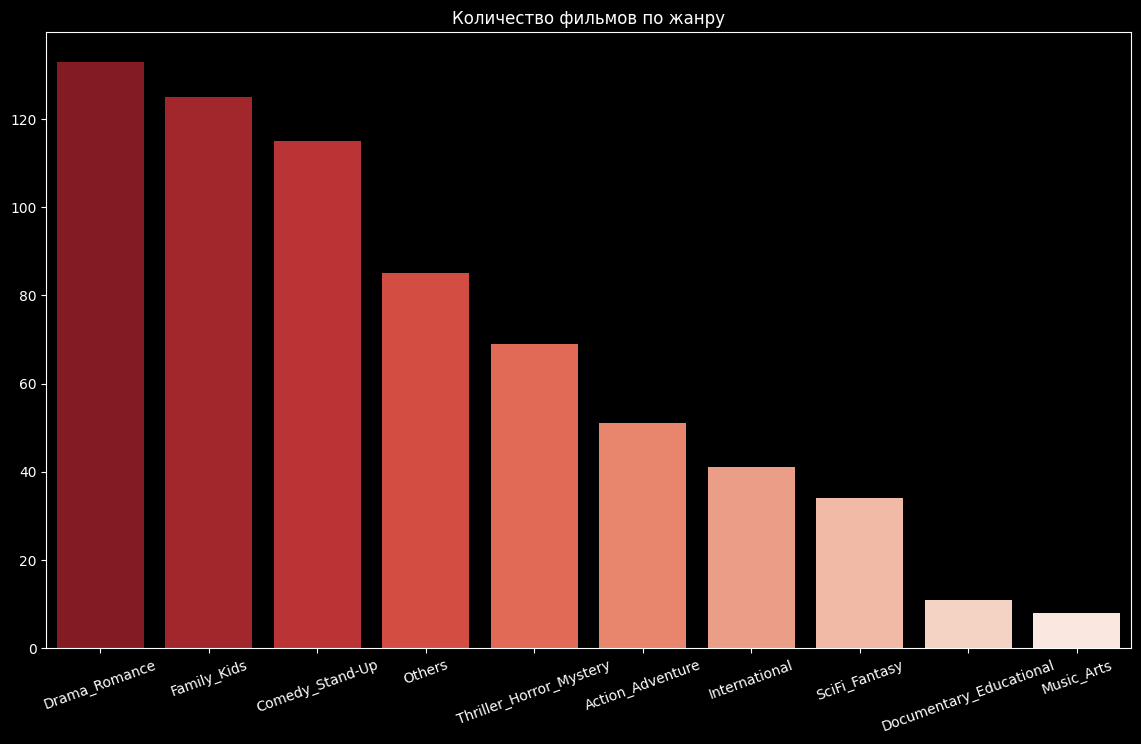

In [ ]:
plt.figure(figsize=(14, 8), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(df_final.loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False), palette='Reds_r')
  plt.title('Количество фильмов по жанру')
  plt.xticks(rotation=20)
plt.show()

/tmp/ipython-input-833010898.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genre_df, x='genre', y='user_rating_score', palette='Reds_r',


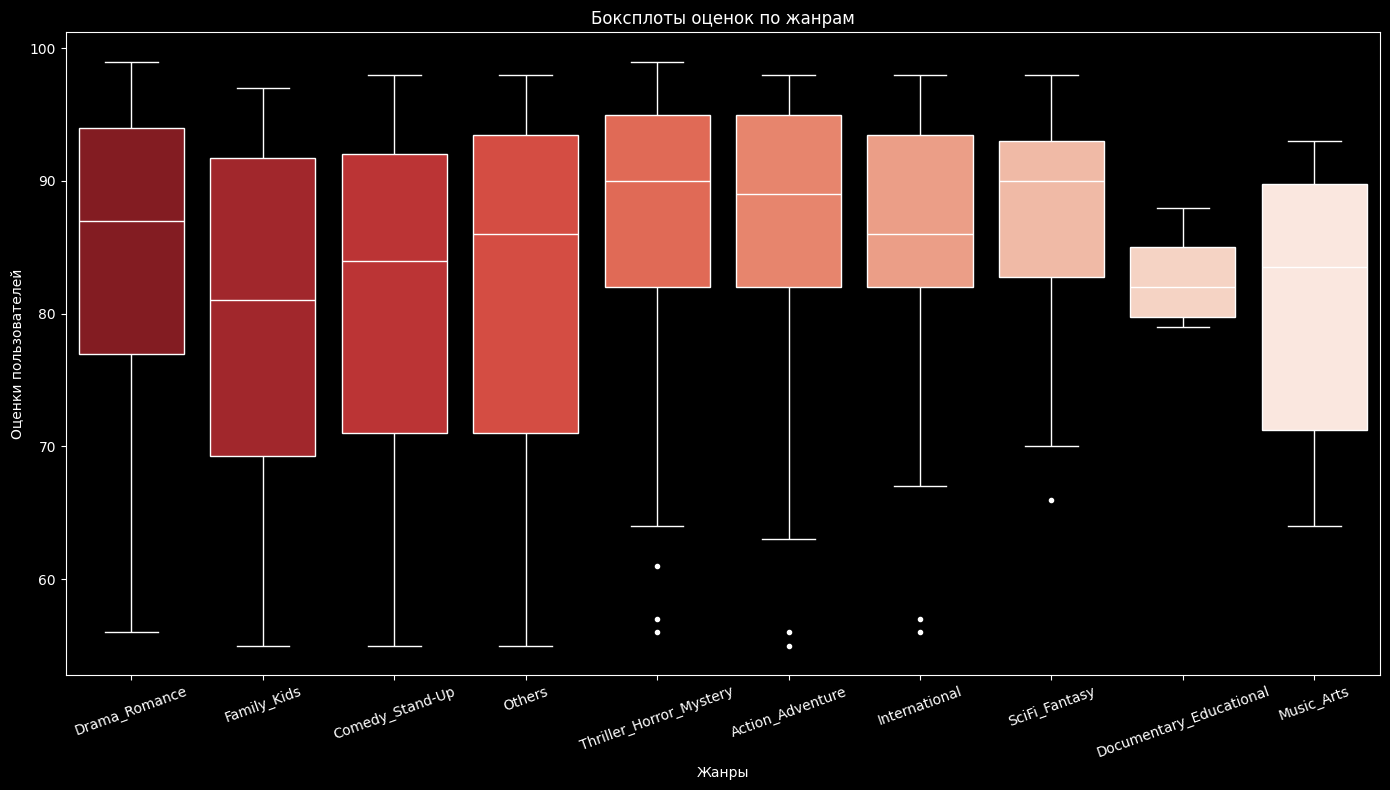

In [ ]:
genre_columns = df_final.loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False).index

genre_data = []
for genre in genre_columns:
    for user_score in df_final[df_final[genre] == True]['user rating score']:
        genre_data.append({'genre': genre, 'user_rating_score': user_score})
genre_df = pd.DataFrame(genre_data)

plt.figure(figsize=(14, 8), facecolor='black')
with plt.style.context('dark_background'):
  sns.boxplot(data=genre_df, x='genre', y='user_rating_score', palette='Reds_r',
                flierprops=dict(markerfacecolor='white', markersize=3, markeredgecolor='white'), boxprops=dict(edgecolor='white'),
                whiskerprops=dict(color='white'), capprops=dict(color='white'), medianprops=dict(color='white'))
  plt.title('Боксплоты оценок по жанрам')
  plt.xlabel('Жанры')
  plt.ylabel('Оценки пользователей')
  plt.xticks(rotation=20)
  plt.tight_layout()
plt.show()

Ну по идее можно сказать, что у Драмы, Триллеров - оч хорошие оценки. (а еще у Action, SciFi)

А драма, family и комеди - больше всего фильмов. Посмотрим их распределение оценок (хотя оно есть на боксплоте)

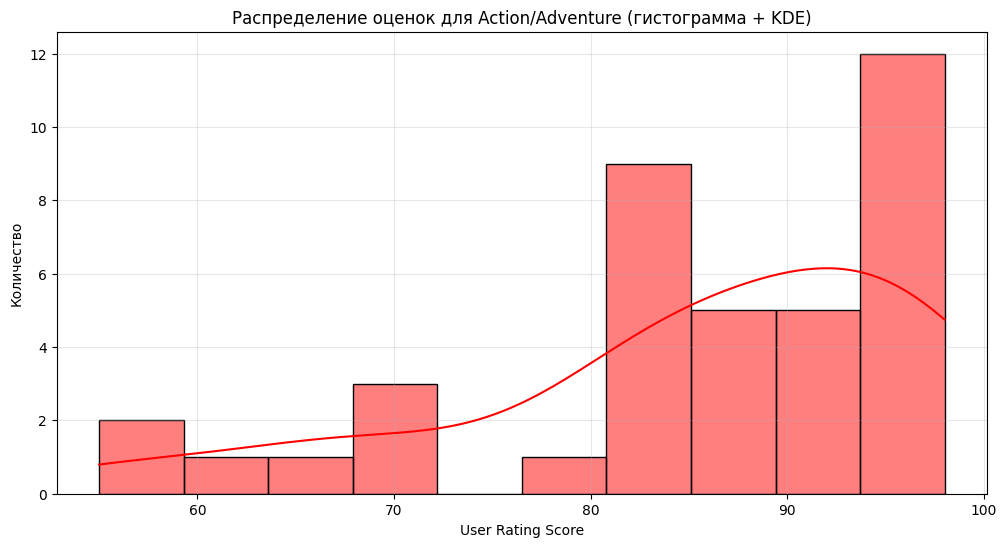

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_final[df_final['Action_Adventure'] == True]['user rating score'], kde=True, bins=10, color='red')
plt.title('Распределение оценок для Action/Adventure (гистограмма + KDE)')
plt.xlabel('User Rating Score')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()

слишком мало данных для валидного распределения

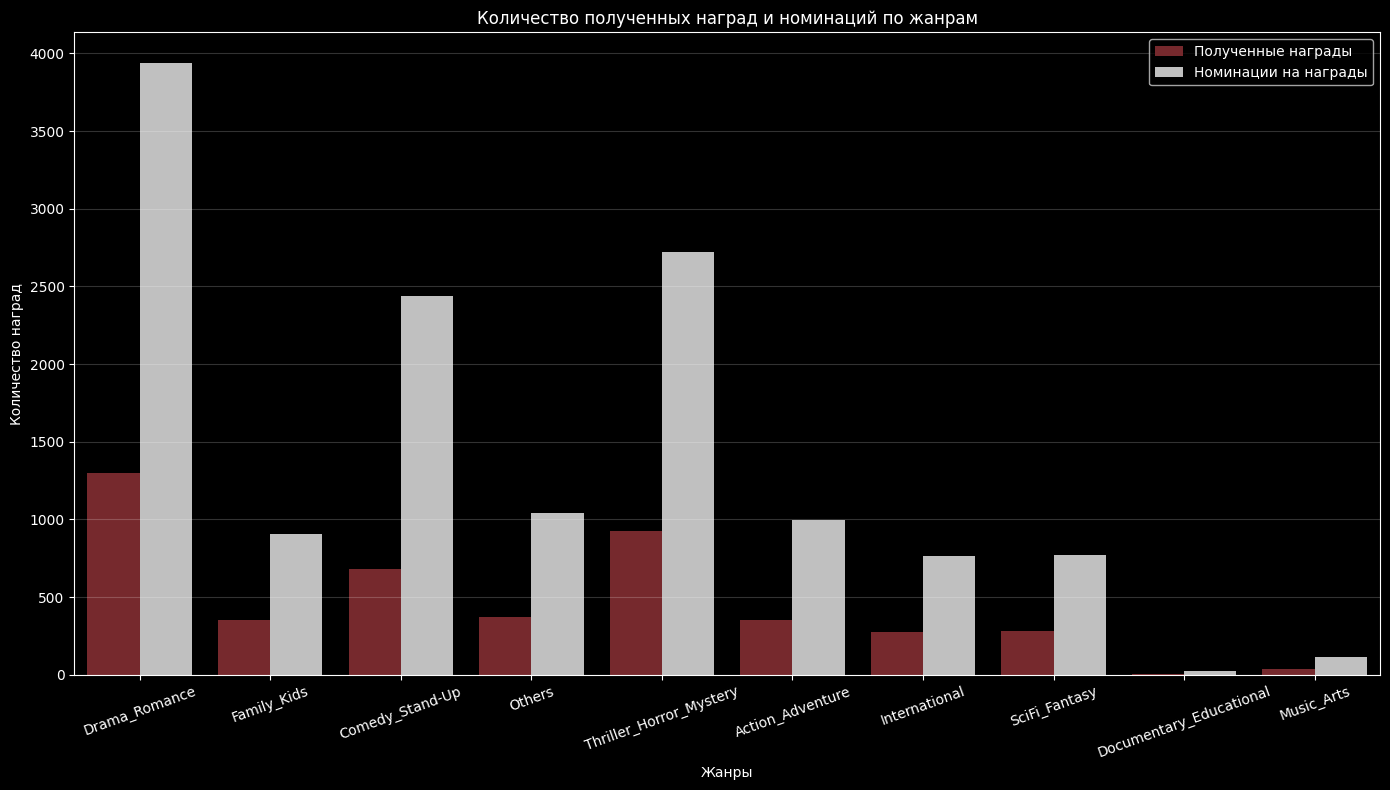

In [ ]:
genre_columns = df_final.loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False).index

awards_data = []
for genre in genre_columns:
    genre_data = df_final[df_final[genre] == 1]
    awards_data.append({'genre': genre,
        'count': genre_data['Awards Received'].sum(),
        'award_type': 'Полученные награды'})
    awards_data.append({'genre': genre,
        'count': genre_data['Awards Nominated For'].sum(),
        'award_type': 'Номинации на награды'})
awards_df = pd.DataFrame(awards_data)

plt.figure(figsize=(14, 8), facecolor='black')
with plt.style.context('dark_background'):
  plt.grid(True, alpha=0.2, axis='y')
  sns.barplot(data=awards_df, x='genre', y='count', hue='award_type', palette=['#831c22', 'silver'])
  plt.xlabel('Жанры')
  plt.ylabel('Количество наград')
  plt.title('Количество полученных наград и номинаций по жанрам')
  plt.xticks(rotation=20)
  plt.legend()
  plt.tight_layout()
plt.show()

In [ ]:
df_final[df_final['user rating score']>=90.0].loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False)

,0
Drama_Romance,39
Thriller_Horror_Mystery,29
Comedy_Stand-Up,28
Others,19
Family_Kids,18
Action_Adventure,17
SciFi_Fantasy,13
International,5
Music_Arts,2
Documentary_Educational,0


/tmp/ipython-input-2468365761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_final[df_final['user rating score']>=90.0].loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False), palette='Reds_r')


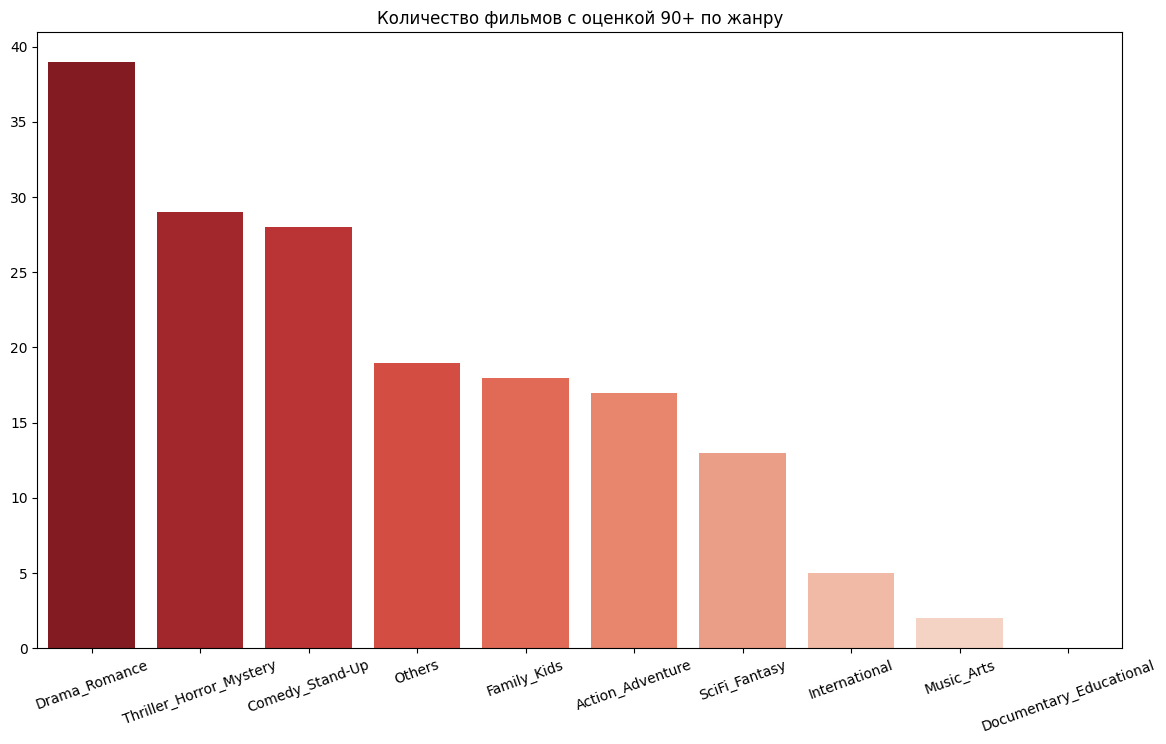

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(df_final[df_final['user rating score']>=90.0].loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False), palette='Reds_r')
plt.title('Количество фильмов с оценкой 90+ по жанру')
plt.xticks(rotation=20)
plt.show()

/tmp/ipython-input-1769258642.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, order=order, palette='Reds_r')


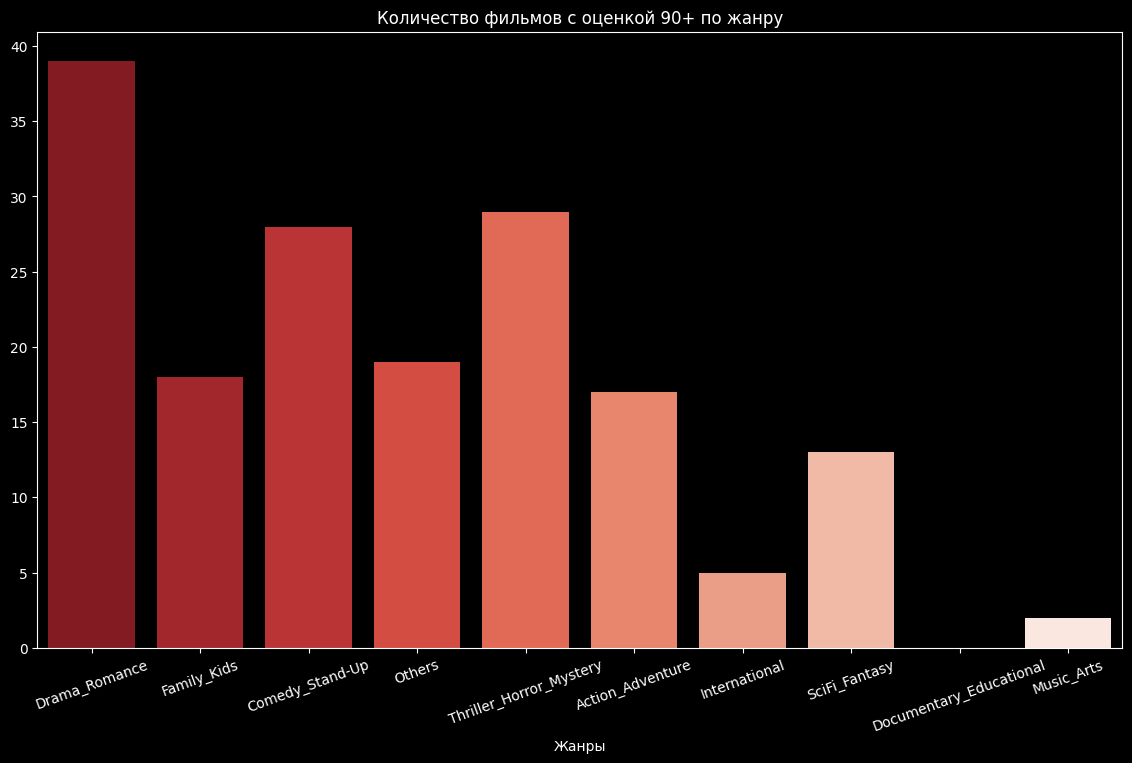

In [ ]:
# то же самое, но столбцы в порядке как на первой гистограмме

order = df_final.loc[:, 'Action_Adventure': 'Others'].sum().sort_values(ascending=False).index
data = df_final[df_final['user rating score'] >= 90.0].loc[:, 'Action_Adventure': 'Others'].sum()
plt.figure(figsize=(14, 8), facecolor='black')
with plt.style.context('dark_background'):
  sns.barplot(x=data.index, y=data.values, order=order, palette='Reds_r')
  plt.title('Количество фильмов с оценкой 90+ по жанру')
  plt.xticks(rotation=20)
  plt.xlabel('Жанры')
plt.show()

## Страны

In [ ]:
help = data_all.groupby(['country']).count()['title'].reset_index(name='count')
help['count'] = np.log2(help['count'])
help.sort_values('count', ascending=False)

,country,count
23,United States,7.451211
3,Canada,4.000000
22,United Kingdom,3.459432
17,Pakistan,2.584963
8,France,2.321928
13,Japan,2.321928
19,South Korea,2.000000
2,Brazil,2.000000
20,Spain,2.000000
10,India,1.584963


In [ ]:
trace0 = go.Choropleth(
    locationmode = 'country names',
    locations = help['country'],
    text = help['country'],
    z = help['count'],
    colorscale='Reds'
)

fig = go.Figure(data = [trace0])
fig.update_layout(width=2000, height=1000)
fig

In [ ]:
trace0 = go.Choropleth(
    locationmode = 'country names',
    locations = help['country'],
    text = help['country'],
    z = help['count'],
    colorscale='Reds'
)

fig = go.Figure(data = [trace0])
# fig.update_layout(width=2000, height=1000)
fig.update_layout(template="plotly_dark", geo=dict(landcolor='#1f1f1f', coastlinewidth=2))
fig

In [ ]:
data_all.groupby('country').count()['title'].reset_index(name='count').sort_values('count', ascending=False)

,country,count
23,United States,175
3,Canada,16
22,United Kingdom,11
17,Pakistan,6
8,France,5
13,Japan,5
19,South Korea,4
2,Brazil,4
20,Spain,4
10,India,3


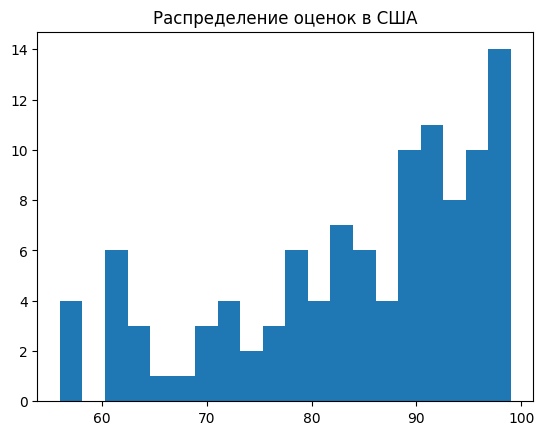

In [ ]:
data_usa = data_all[data_all['country'] == 'United States']
plt.hist(data_usa['user rating score'], bins=20)
plt.title('Распределение оценок в США')

plt.show()

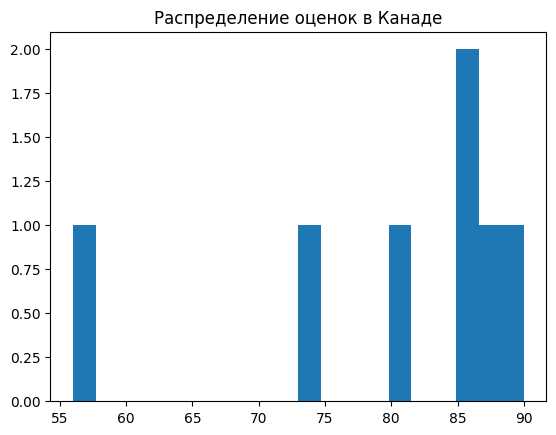

In [ ]:
data_canada = data_all[data_all['country'] == 'Canada']
plt.hist(data_canada['user rating score'], bins=20)
plt.title('Распределение оценок в Канаде')

plt.show()

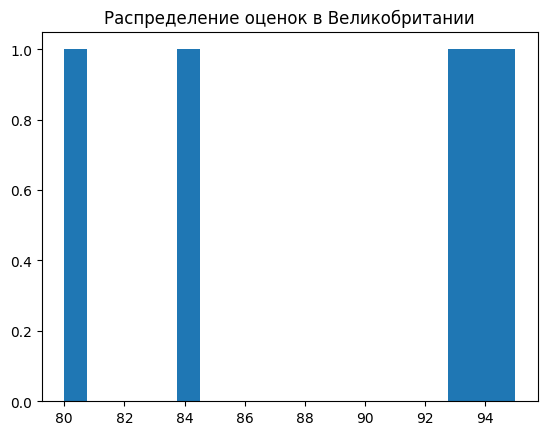

In [ ]:
data_uk = data_all[data_all['country'] == 'United Kingdom']
plt.hist(data_uk['user rating score'], bins=20)
plt.title('Распределение оценок в Великобритании')

plt.show()

<Axes: xlabel='user rating score'>

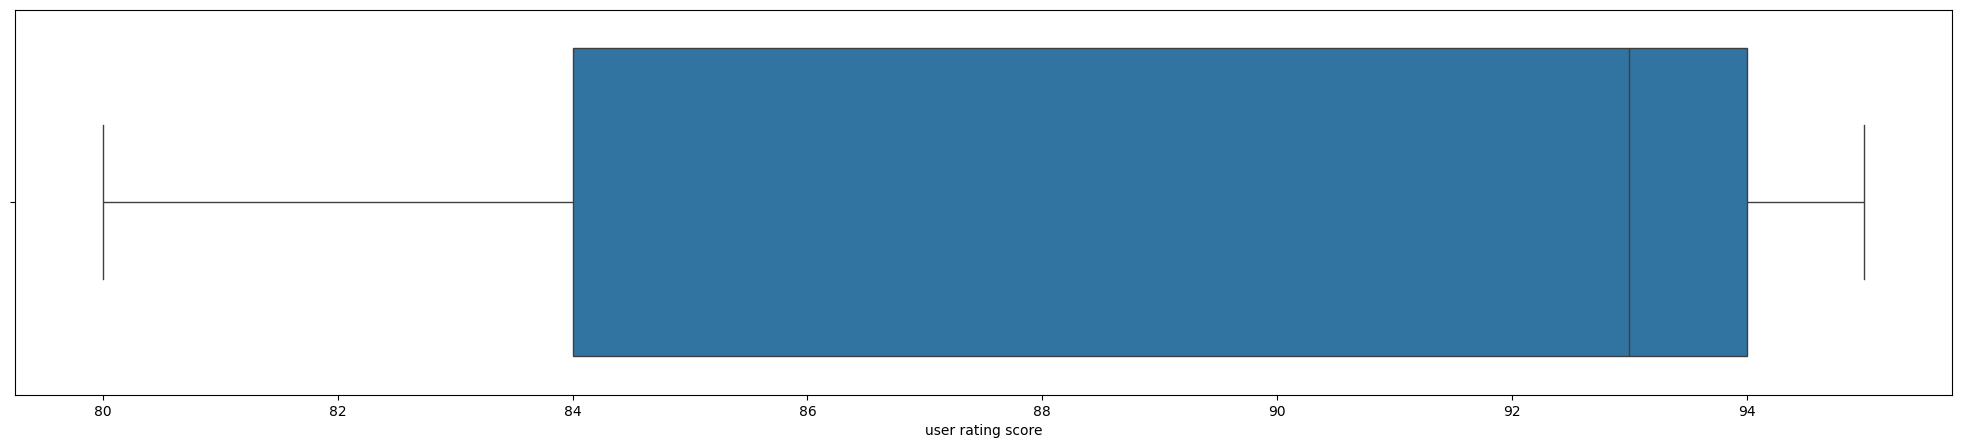

In [ ]:
plt.figure(figsize=(25, 5))
sns.boxplot(x=data_uk['user rating score'])

In [ ]:
data_all[~data_all['country'].isin(['Argentina', 'Cyprus', 'Italy',
                                     'Netherlands', 'Mexico', 'Nigeria',
                                     'Turkey', 'Brazil', 'Ireland', 'South Korea', 'Egypt'])].groupby('country')['user rating score'].min().reset_index(name='min').sort_values('min', ascending=False)

,country,min
3,Finland,86.0
6,India,84.0
8,Pakistan,81.0
9,Russia,81.0
11,United Kingdom,80.0
5,Hong Kong,74.0
0,Australia,74.0
4,France,71.0
2,Denmark,67.0
10,Spain,67.0


In [ ]:
data_all[~data_all['country'].isin(['Argentina', 'Cyprus', 'Italy',
                                     'Netherlands', 'Mexico', 'Nigeria',
                                     'Turkey', 'Brazil', 'Ireland', 'South Korea', 'Egypt'])].groupby('country')['user rating score'].max().reset_index(name='max').sort_values('max', ascending=False)

,country,max
12,United States,99.0
6,India,97.0
11,United Kingdom,95.0
1,Canada,90.0
7,Japan,88.0
3,Finland,86.0
8,Pakistan,84.0
9,Russia,81.0
0,Australia,74.0
5,Hong Kong,74.0


In [ ]:
data_all[data_all['country'] == 'India'][['title', 'rating', 'release year', 'user rating score', 'country', 'Awards Received', 'Awards Nominated For']]

,title,rating,release year,user rating score,country,Awards Received,Awards Nominated For
74,Love,R,2017,NaN,India,1.0,1.0
262,Limitless,TV-14,2016,84.0,India,NaN,NaN
316,The Jungle Book,PG,2016,97.0,India,NaN,NaN


In [ ]:
data_all[data_all['country'] == 'Pakistan']

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,country,listed_in,Awards Received,Awards Nominated For,Boxoffice,Genre
184,Friday Night Lights,PG,Parental guidance suggested. May not be suitab...,70,2010,81.0,80,Pakistan,"TV Dramas, Teen TV Shows",2.0,5.0,61255921.0,"Action, Drama, Sport"
206,Revenge,PG,Parental guidance suggested. May not be suitab...,70,2015,84.0,80,Pakistan,"Crime TV Shows, International TV Shows, TV Dramas",3.0,10.0,102091.0,"Action, Horror, Thriller"
312,Edgar Rice Burroughs' Tarzan and Jane,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,42,2017,NaN,82,Pakistan,"Crime TV Shows, Kids' TV",NaN,NaN,NaN,NaN
341,Power Rangers Super Megaforce,TV-Y7,Suitable for children ages 7 and older,41,2014,NaN,82,Pakistan,Kids' TV,NaN,NaN,NaN,NaN
352,Power Rangers Dino Super Charge,TV-Y7,Suitable for children ages 7 and older,41,2016,NaN,82,Pakistan,Kids' TV,NaN,NaN,NaN,NaN
398,DreamWorks Spooky Stories: Volume 2,PG,Parental guidance suggested. May not be suitab...,70,2011,NaN,82,Pakistan,"Kids' TV, TV Comedies",NaN,NaN,NaN,"Animation, Action, Adventure, Comedy, Family, ..."


In [ ]:
data_genre_country[data_genre_country['title'] == 'Limitless']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2642,s3469,Movie,Limitless,Vrinda Samartha,India,10/1/2019,2017,TV-PG,59 min,"Documentaries, International Movies, Sports Mo..."


в индии хорошая оценка - мб больше спонсировать их

In [ ]:
year_usa = data_all[data_all['country'] == 'United States'].groupby('release year')['title'].count().reset_index(name='count')
year_usa

,release year,count
0,1978,1
1,1986,1
2,1989,1
3,1991,1
4,1995,1
5,1996,1
6,1998,1
7,1999,2
8,2001,2
9,2003,1


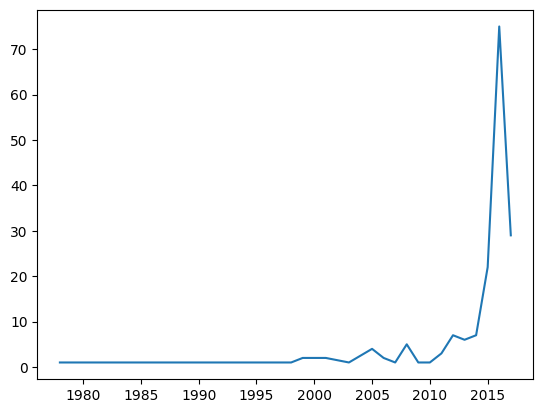

In [ ]:
plt.plot(year_usa['release year'], year_usa['count'])
plt.show()

In [ ]:
year_canada = data_all[data_all['country'] == 'Canada'].groupby('release year')['title'].count().reset_index(name='count')
year_canada

,release year,count
0,1997,2
1,1998,1
2,2009,1
3,2012,1
4,2014,1
5,2015,4
6,2016,6


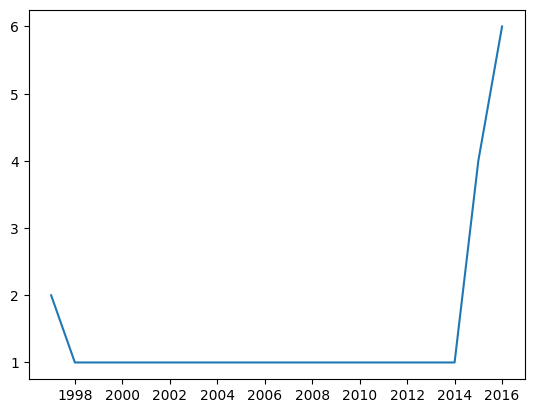

In [ ]:
plt.plot(year_canada['release year'], year_canada['count'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.show()

In [ ]:
data_all.groupby('country').count()['Awards Received'].reset_index(name='count').sort_values('count', ascending=False)

,country,count
23,United States,82
22,United Kingdom,7
3,Canada,6
20,Spain,3
8,France,2
17,Pakistan,2
6,Egypt,1
1,Australia,1
16,Nigeria,1
13,Japan,1


In [ ]:
data_all.groupby('country').count()['Awards Nominated For'].reset_index(name='count').sort_values('count', ascending=False)

,country,count
23,United States,98
3,Canada,8
22,United Kingdom,8
8,France,3
20,Spain,3
1,Australia,2
19,South Korea,2
17,Pakistan,2
12,Italy,1
16,Nigeria,1


## Рейтинг и полученные награды

In [ ]:
def categorize_rating(score):
    if pd.isna(score):
        return 'No Rating'
    elif score > 93:
        return 'High Rating (>93)'
    elif 71 <= score <= 93:
        return 'Medium Rating (71-93)'
    else:
        return 'Low Rating (<71)'

data_all['rating_category'] = data_all['user rating score'].apply(categorize_rating)

data_all['Awards Received'] = data_all['Awards Received'].fillna(0)
data_all['Awards Nominated For'] = data_all['Awards Nominated For'].fillna(0)

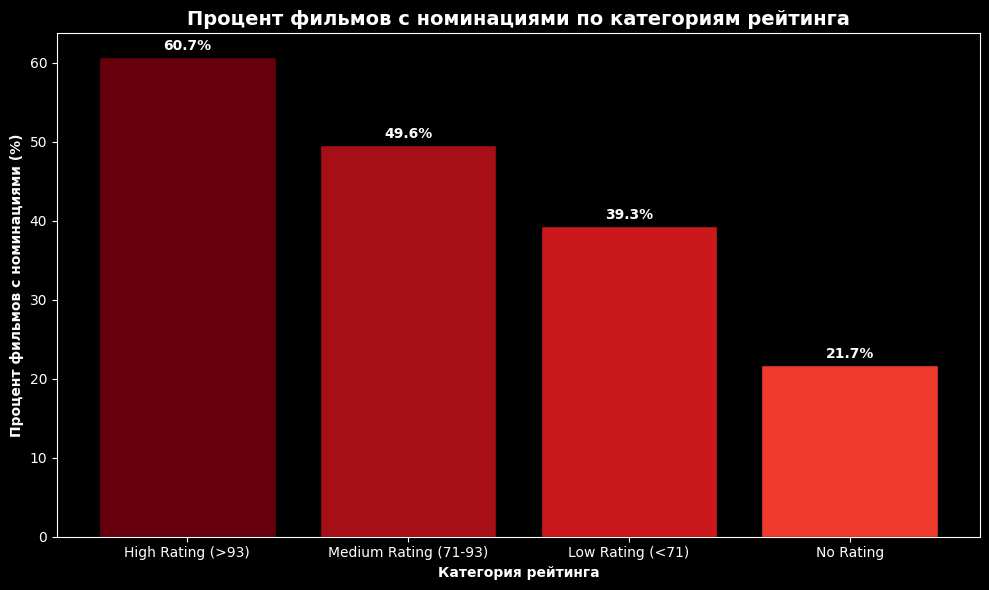

In [ ]:
nominated_data = data_all.groupby('rating_category').agg(
    total_films=('Awards Nominated For', 'count'),
    films_with_nominations=('Awards Nominated For', lambda x: (x > 0).sum()),
    percentage_with_nominations=('Awards Nominated For', lambda x: (x > 0).mean() * 100)
).round(2).reset_index()

nominated_data = nominated_data.sort_values('rating_category', key=lambda x: x.map({'High Rating (>93)': 0, 'Medium Rating (71-93)': 1, 'Low Rating (<71)': 2, 'No Rating': 3}))


plt.figure(figsize=(10, 6))
categories = nominated_data['rating_category']
percentage = nominated_data['percentage_with_nominations']

plt.style.use('dark_background')
colors = ['#67000D', '#A50F15', '#CB181D', '#EF3B2C']
bars = plt.bar(categories, percentage, color=colors, edgecolor='black')

plt.title('Процент фильмов с номинациями по категориям рейтинга', fontsize=14, fontweight='bold')
plt.xlabel('Категория рейтинга', fontweight='bold')
plt.ylabel('Процент фильмов с номинациями (%)', fontweight='bold')

for bar, value in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

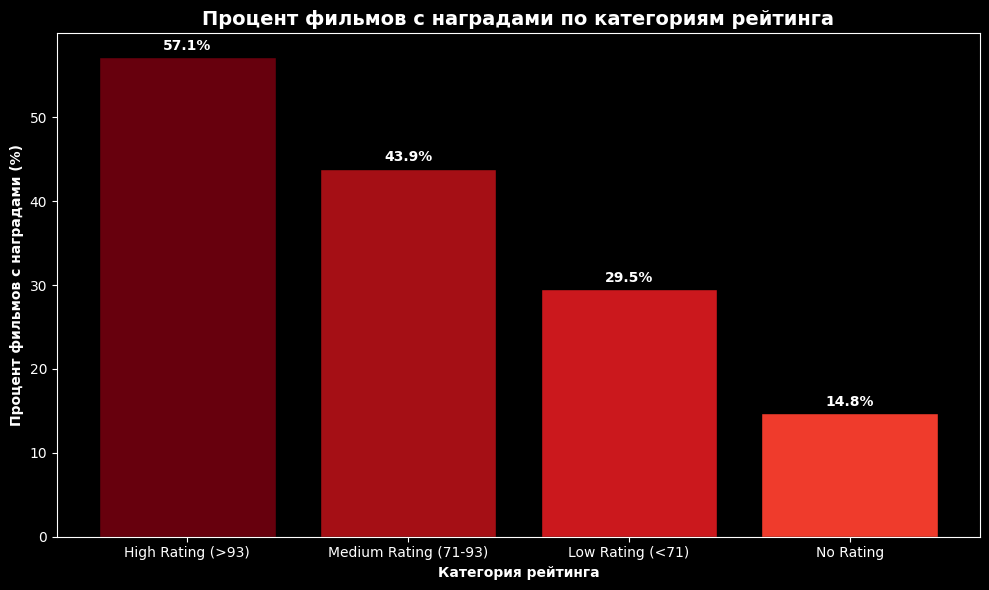

In [ ]:
awards_data = data_all.groupby('rating_category').agg(
    total_films=('Awards Received', 'count'),
    films_with_awards=('Awards Received', lambda x: (x > 0).sum()),
    percentage_with_awards=('Awards Received', lambda x: (x > 0).mean() * 100)
).round(2).reset_index()

awards_data = awards_data.sort_values('rating_category', key=lambda x: x.map({'High Rating (>93)': 0, 'Medium Rating (71-93)': 1, 'Low Rating (<71)': 2, 'No Rating': 3}))

plt.figure(figsize=(10, 6))
categories = awards_data['rating_category']
percentage = awards_data['percentage_with_awards']

plt.style.use('dark_background')
colors = ['#67000D', '#A50F15', '#CB181D', '#EF3B2C']
bars = plt.bar(categories, percentage, color=colors, edgecolor='black')

plt.title('Процент фильмов с наградами по категориям рейтинга', fontsize=14, fontweight='bold')
plt.xlabel('Категория рейтинга', fontweight='bold')
plt.ylabel('Процент фильмов с наградами (%)', fontweight='bold')

for bar, value in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Какие ограничения по возрасту часто получают награды

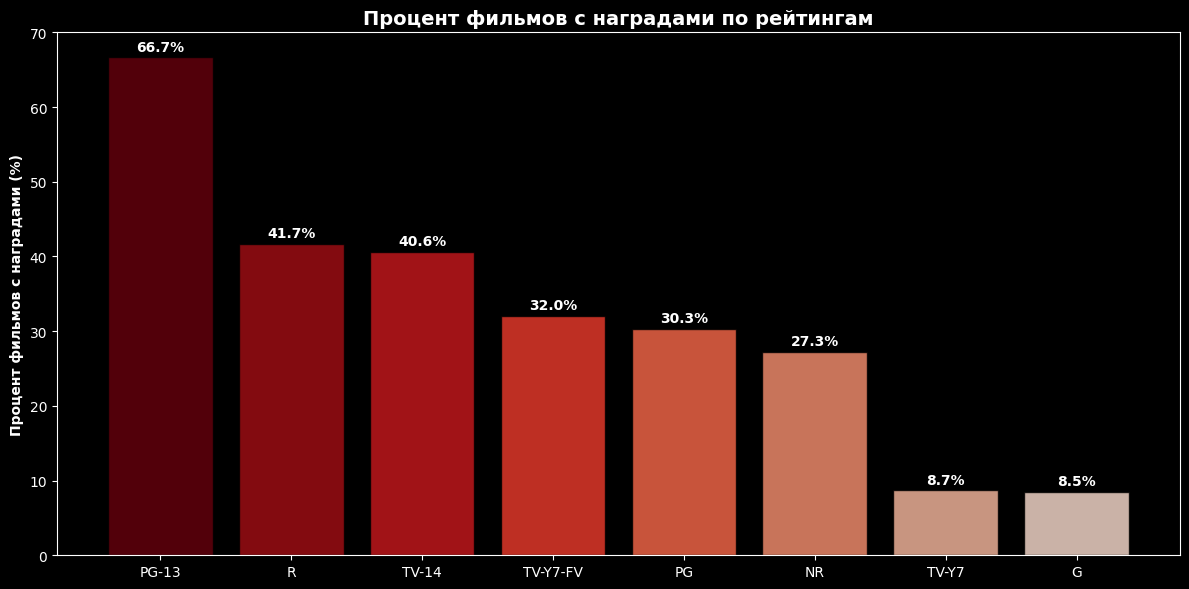

In [ ]:
rating_awards_data = data_all.groupby('rating').agg(
    total_films=('Awards Received', 'count'),
    percentage_with_awards=('Awards Received', lambda x: (x > 0).mean() * 100),
    percentage_with_nominations=('Awards Nominated For', lambda x: (x > 0).mean() * 100)
).round(2).reset_index()

rating_awards_data = rating_awards_data.sort_values('percentage_with_awards', ascending=False)

plt.figure(figsize=(12, 6))
ratings = rating_awards_data['rating']
percentage_awards = rating_awards_data['percentage_with_awards']

plt.style.use('dark_background')
colors = ['#67000D', '#A50F15', '#CB181D', '#EF3B2C', '#FB6A4A', '#FC9272', '#FCBBA1', '#FEE0D2']
bars1 = plt.bar(ratings, percentage_awards, color=colors[:len(ratings)], edgecolor='black', alpha=0.8)

plt.title('Процент фильмов с наградами по рейтингам', fontsize=14, fontweight='bold')
plt.ylabel('Процент фильмов с наградами (%)', fontweight='bold')

for bar, value in zip(bars1, percentage_awards):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

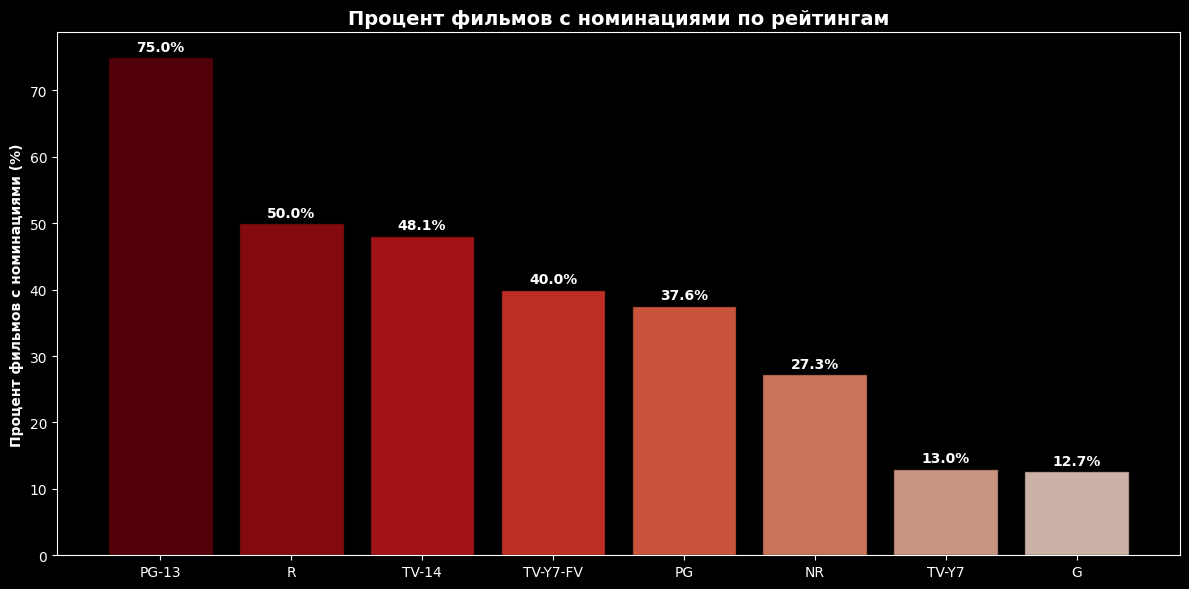

In [ ]:
plt.figure(figsize=(12, 6))
percentage_nominations = rating_awards_data['percentage_with_nominations']

bars2 = plt.bar(ratings, percentage_nominations, color=colors[:len(ratings)], edgecolor='black', alpha=0.8)

plt.title('Процент фильмов с номинациями по рейтингам', fontsize=14, fontweight='bold')
plt.ylabel('Процент фильмов с номинациями (%)', fontweight='bold')

for bar, value in zip(bars2, percentage_nominations):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()